# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve, make_scorer,
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [ ]:
hotels = pd.read_csv('/content/drive/MyDrive/DSBA Certificate/Old Projects + Quiz + MLS Files/INNHotelsGroup.csv')

In [ ]:
#view data shape
hotels.shape

(36275, 19)

In [ ]:
#sneak peek
hotels.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00000,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55000,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61000,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90000,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44000,3,Not_Canceled


In [ ]:
#information
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
#check missing
hotels.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
#check duplicates
hotels.duplicated().sum()

0

In [ ]:
hotels.Booking_ID.nunique()

36275

In [ ]:
hotels.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


- There are no duplicates or missing values in the data.
- type_of_meal_plan , room_type_reserved , market_segment_type , and booking_status are object types. (Dummy Variables / Label Encoding will be in our future)
- Since booking_ID is all unique values, we will drop the column as it will not serve to identify patterns.
- There is a minimum number of adults being 0, which is strange for booking a hotel room. The range of children in a hotel is 0 to 10. There are also minimums of 0 in average_price_per_room, which we will investigate.
- Most customers do not require parking, as the min = 0, max = 1 with at least 75% of data being no parking required.
- **TIME LINE Data:**
  - Some customers are booking over a year in advance, as the maximum value of lead_time is 443 days.
  - The data is from the years 2017-2018
  - Arrival_month spans all 12 months of the year

In [ ]:
#drop booking id
hotel = hotels.drop(['Booking_ID'], axis = 1)
#check data
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Apply shared codes to create specialized plots

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Univariate Analysis
*See below for responses to questions 1, 2, & 4 as well as insights to individual columns of the data.*
* **Number of Adults:** majority of bookings have 2 adult occupants. The data is
slightly skewed left due to some entries adults in the booking. We will likely impute these 0-values as NaN.
* **Number of Children:** majority of bookings have no children present. While larger numbers of children display as outliers, they are proper values and will not be edited.
* **Number of Weekend Nights:** data is skewed right. 50% of bookings include 0-2 weekend nights. Some longer stays will result in more weekend night stays, so the outliers in the data are proper values.
* **Number of Week Nights:** Most bookings have a duration of 0-6 week nights. The data is slightly skewed left, reflecting some long-term stays.
* **Lead Time:** data is skewed right. There are 5,000+ incidents of booking a few days in advance, whereas >25% of the data displays customers booking over 100 days in advance.
* **Arrival Date:** the day of the month when a customer arrives is displayed in a uniform pattern. There is not a bias on the day of the month for a booking to begin.
* **Number of Previous Cancellations:** most customers have not cancelled their booking in the past.
* **Average Price Per Room:** Data is slightly skewed right as there are some bookings that are quite expensive (>200 euros). There exist some data that display rooms with a price of 0 euros. We will likely impute these 0-values as NaN.
* **Meal Plans:** 76.7% of customers opt for breakfast meals plans. Less Than 10% of customers buy meal plans that include more than breakfast.
* **Parking Spaces:** 96.9% of customers do not require parking in their booking procedures
* **Room Type:** Two most popular room types are Type 1 (77.5%) and Type 4 (16.7%)
* **Arrival Year:** 82% of the data includes bookings in the year 2018. All data corresponds to a two-year timeline of 2017-2018.
* ***Question 1,* Busy Months:** the least popular time of travel is January (2.8% of bookings). Most popular months of travel (55% off bookings) are October, September, August, June, and December.
* ***Question 2,* Market Type:** 64% of customers book their hotels online. only 7% of customers book through Corporate, Complementary, or Aviation markets.
* **Repeat Guests:** 97.4% of customers have not booked with INN Hotels. Very few guests are repeat customers.
* **Special Requests:** more than half the data reflects that customers do not require special services. If a customer has a special need, they will likely only make 1-2 requests (43.4% of data).
* ***Question 4,* Cancellation Percentages:** 67.2% of bookings do not get cancelled, whereas 32.8% of bookings are cancelled.

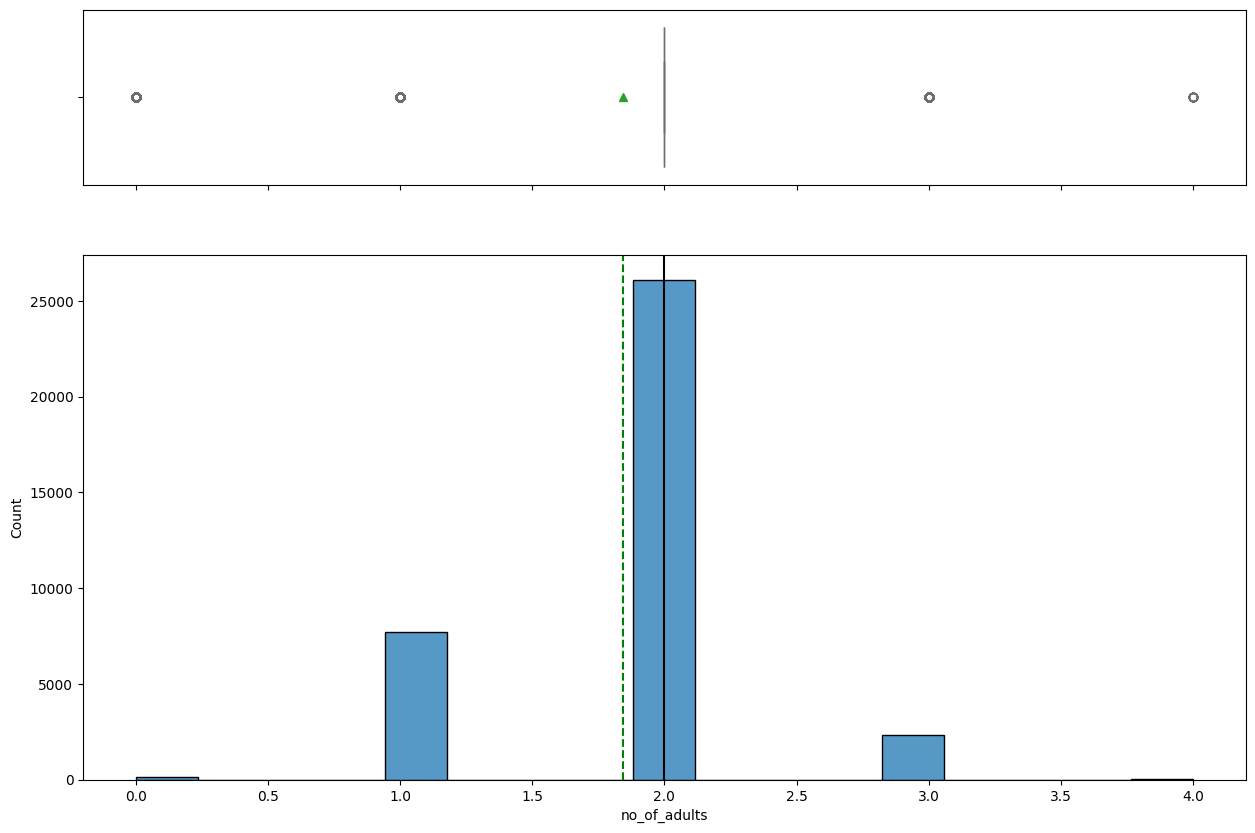

In [ ]:
histogram_boxplot(hotel, 'no_of_adults')

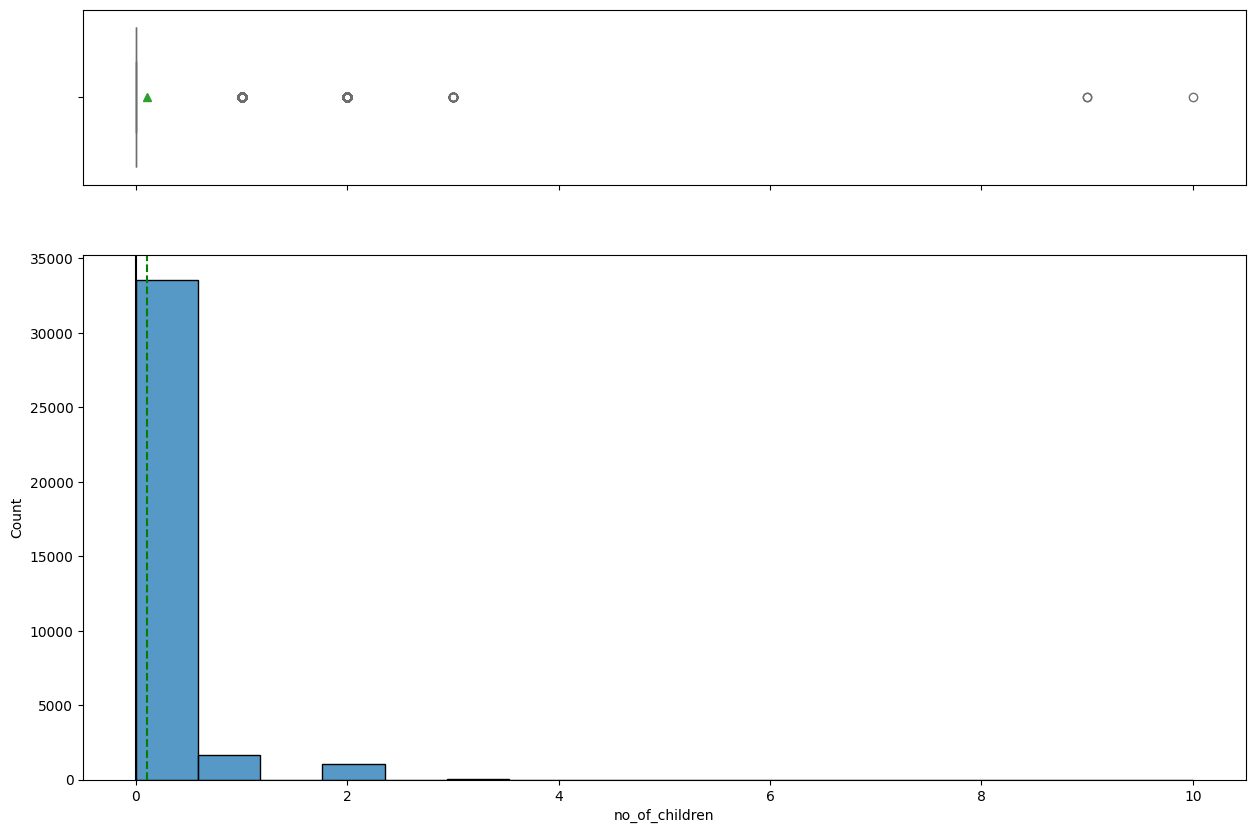

In [ ]:
histogram_boxplot(hotel, 'no_of_children')

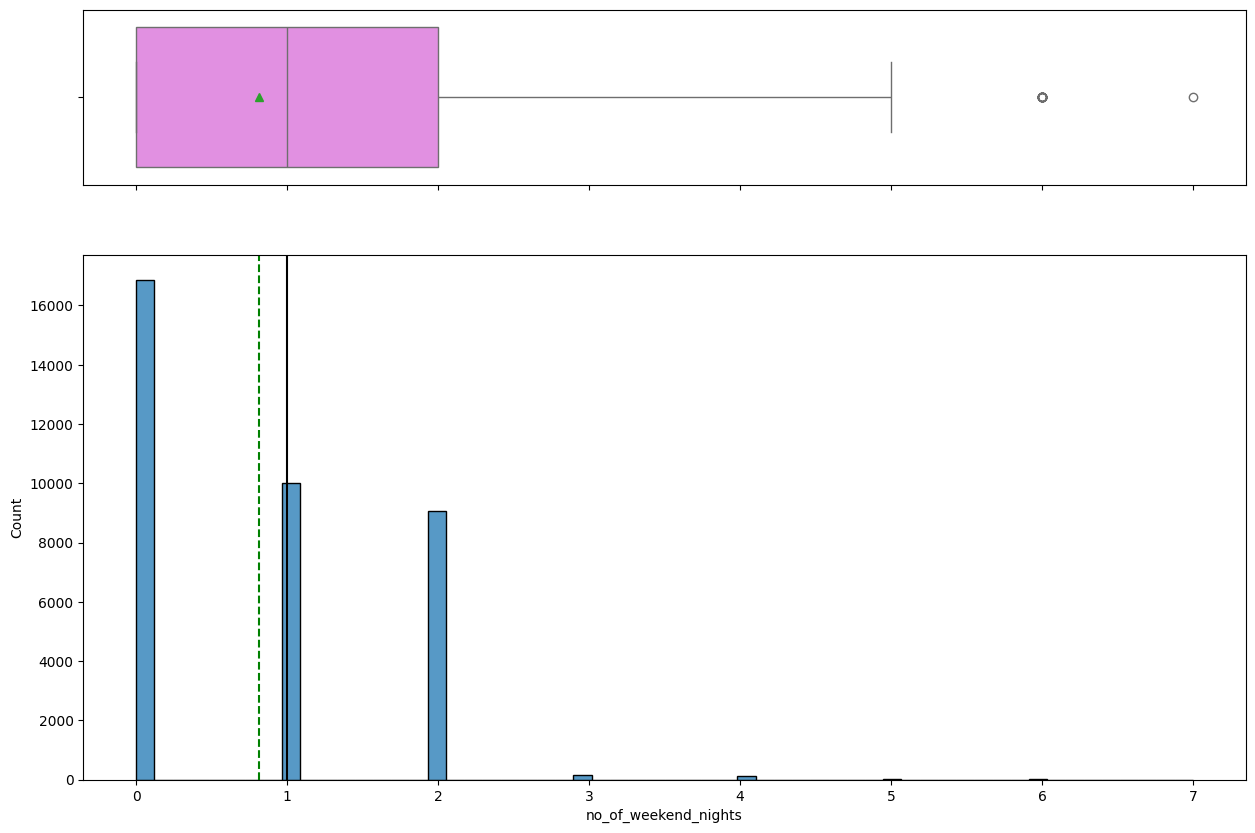

In [ ]:
histogram_boxplot(hotel, 'no_of_weekend_nights')

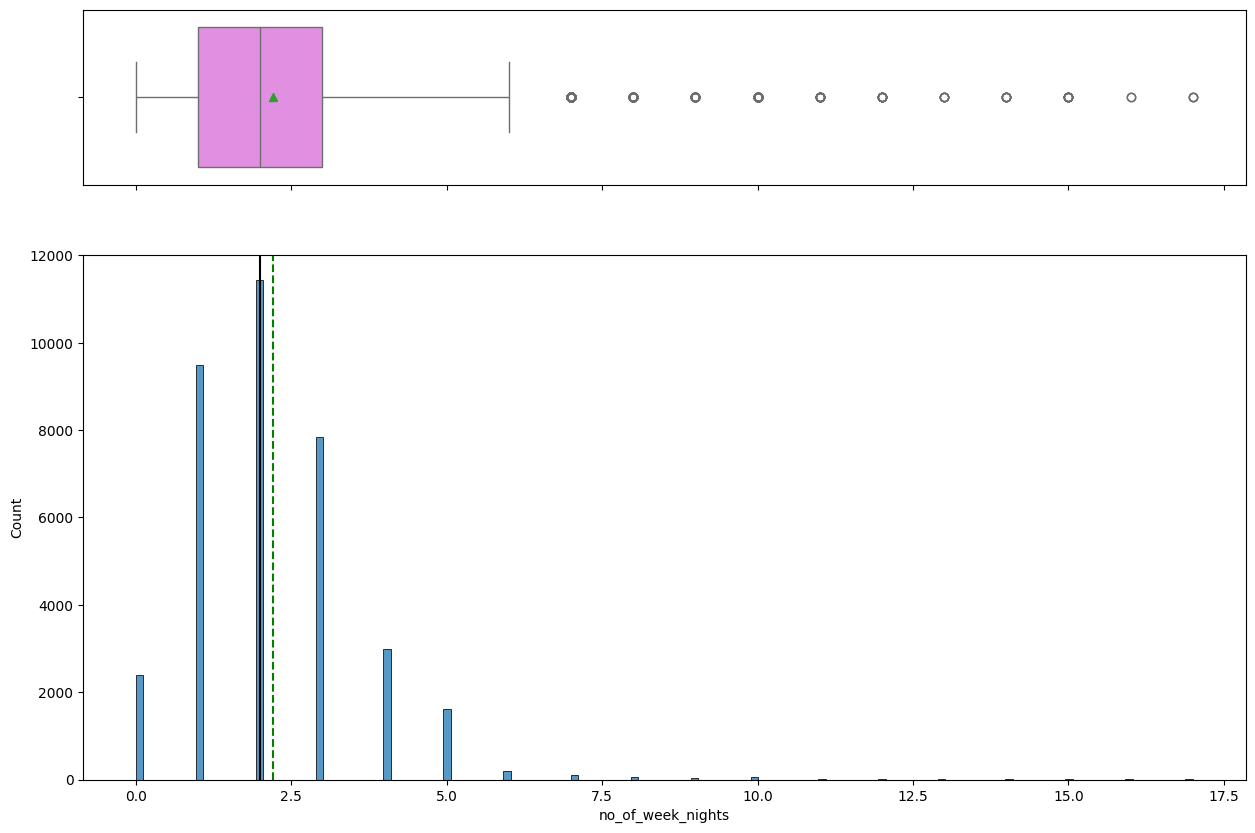

In [ ]:
histogram_boxplot(hotel, 'no_of_week_nights')

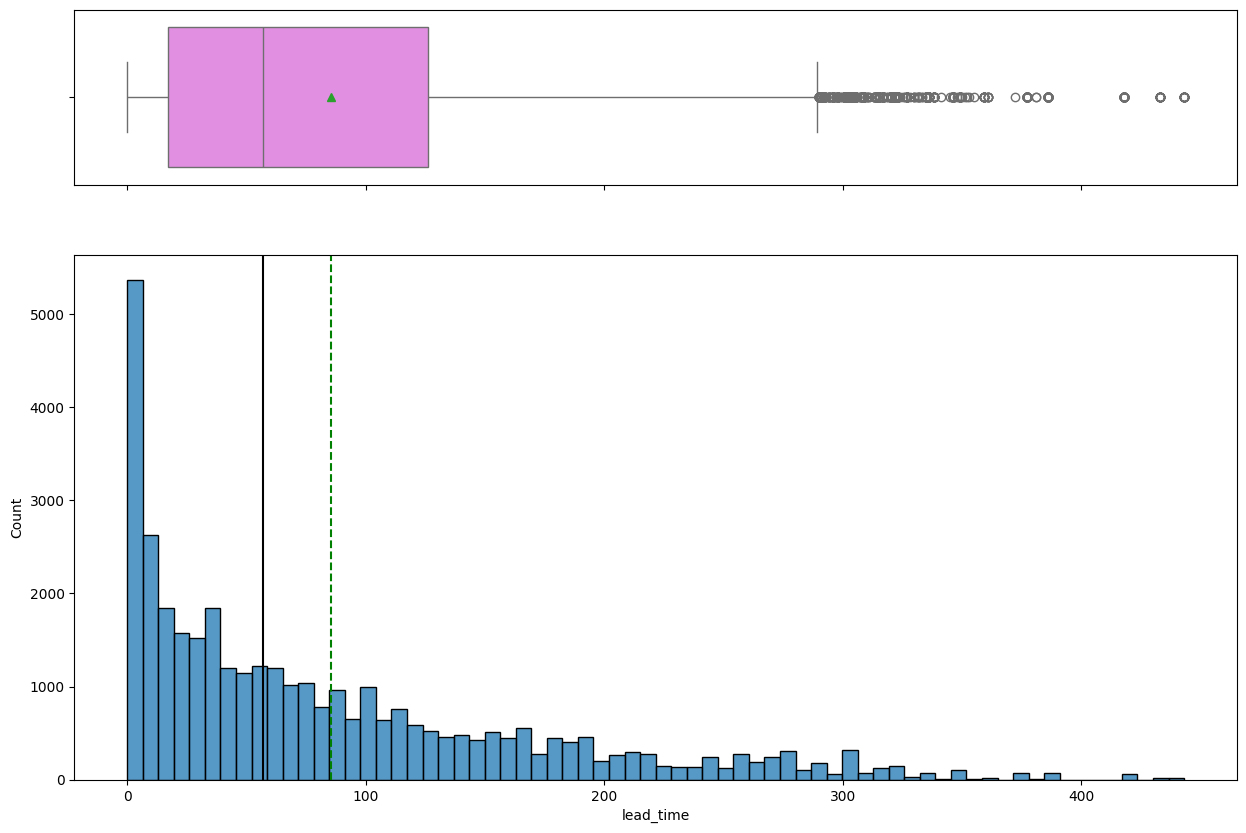

In [ ]:
histogram_boxplot(hotel, 'lead_time')

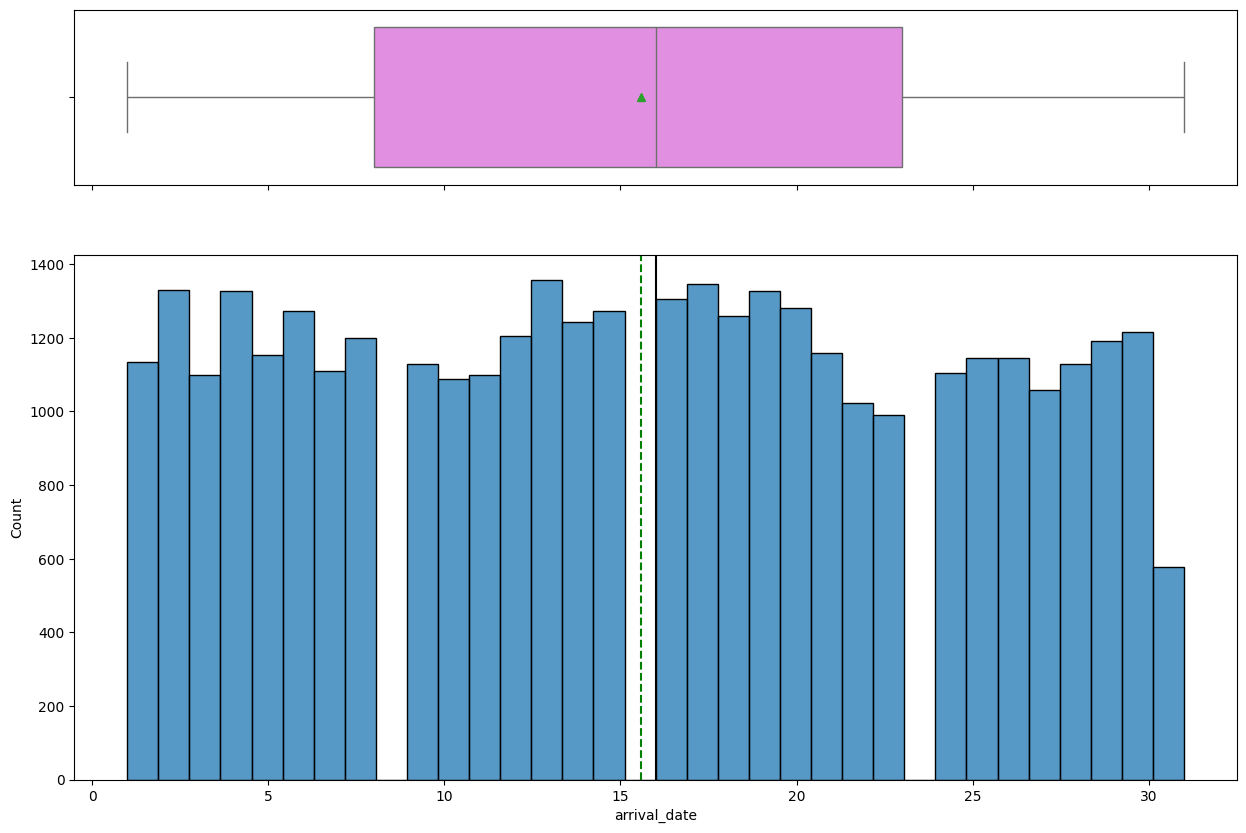

In [ ]:
histogram_boxplot(hotel, 'arrival_date')

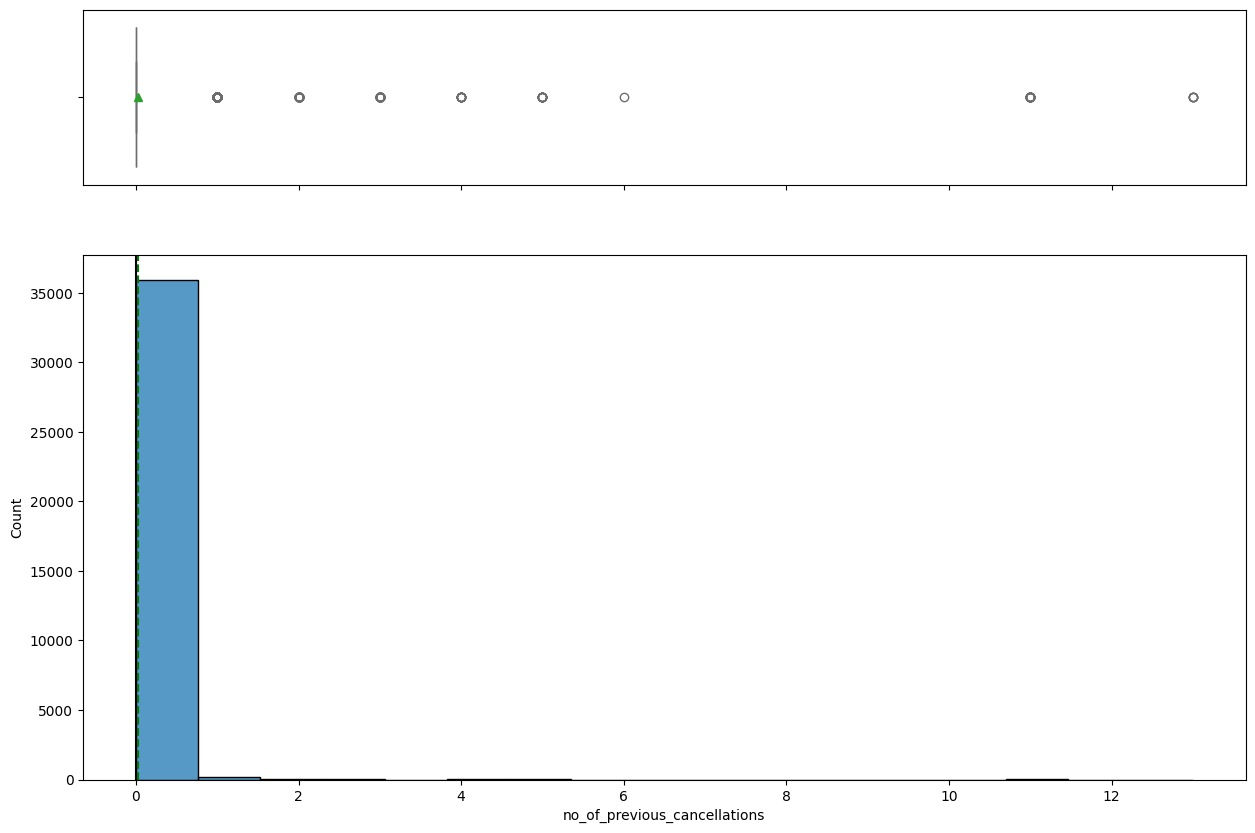

In [ ]:
histogram_boxplot(hotel, 'no_of_previous_cancellations')

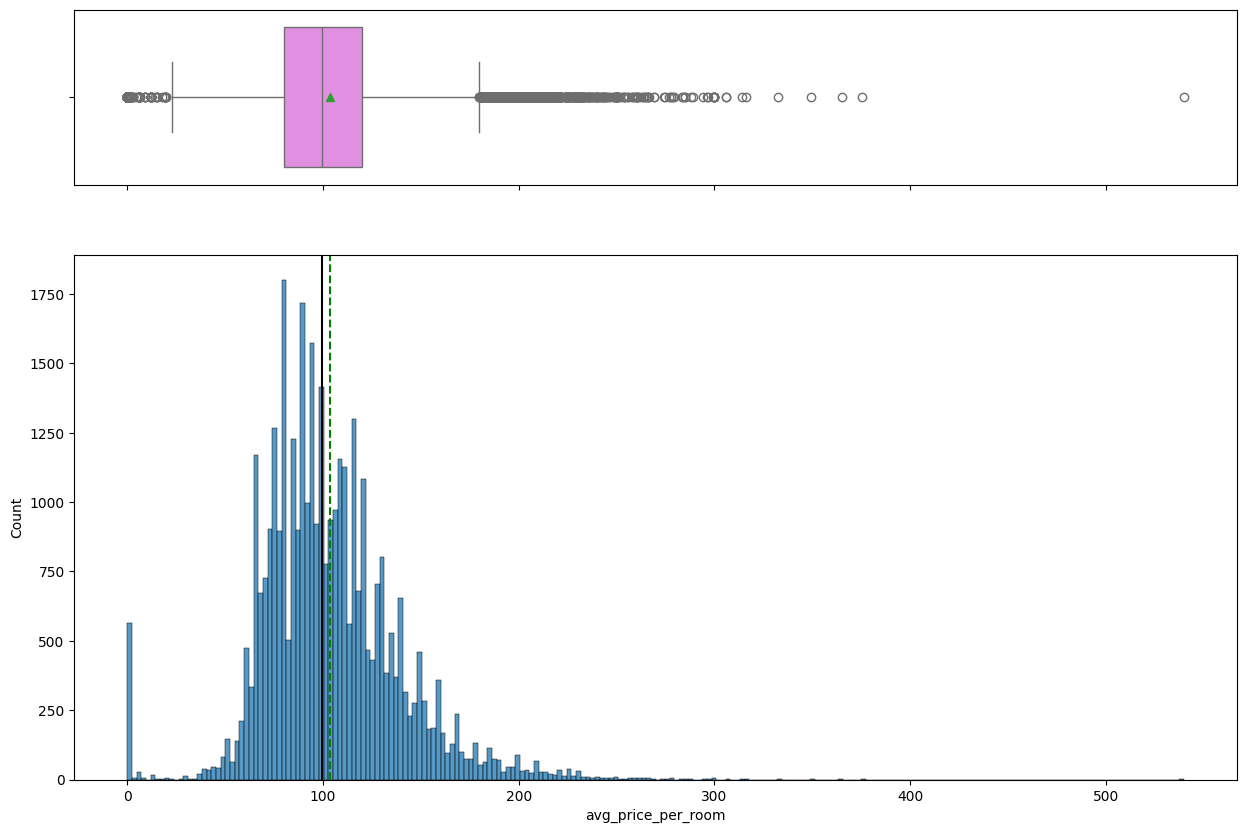

In [ ]:
histogram_boxplot(hotel, 'avg_price_per_room')

<Axes: xlabel='avg_price_per_room'>

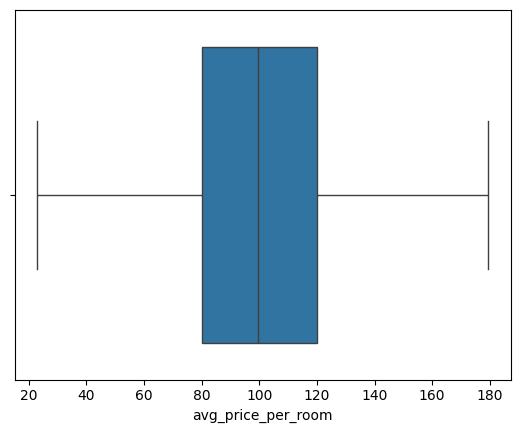

In [ ]:
sns.boxplot(hotel, x='avg_price_per_room', showfliers=False)

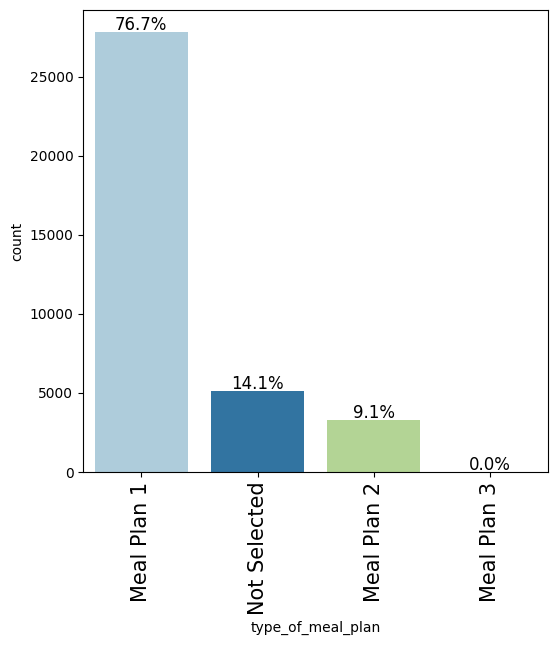

In [ ]:
labeled_barplot(hotel, 'type_of_meal_plan')

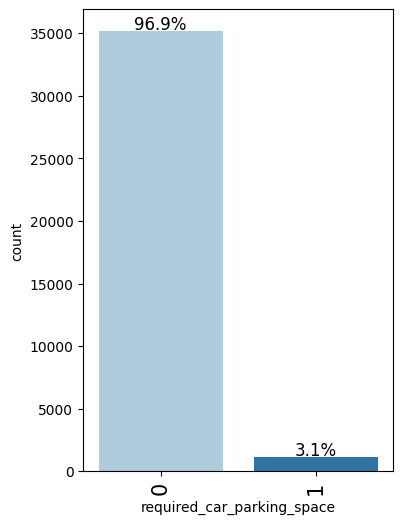

In [ ]:
labeled_barplot(hotel, 'required_car_parking_space')

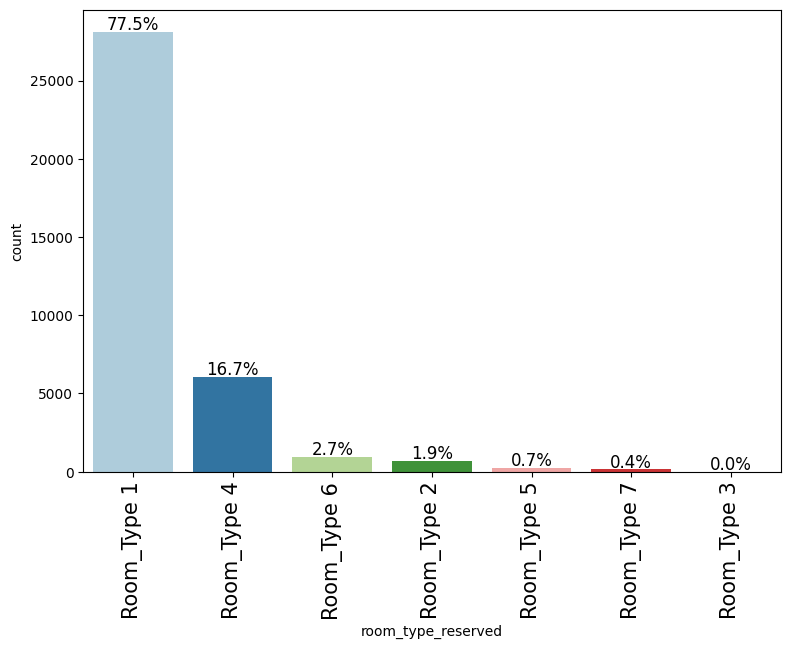

In [ ]:
labeled_barplot(hotel, 'room_type_reserved')

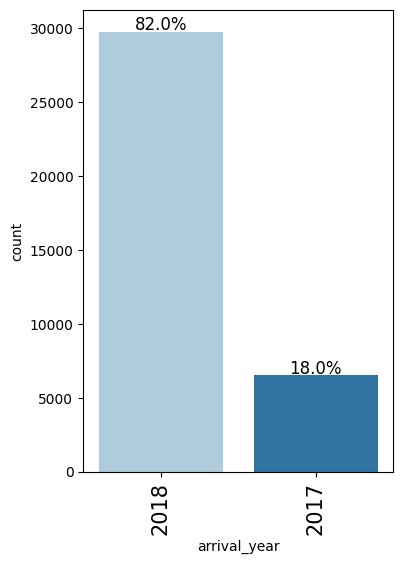

In [ ]:
labeled_barplot(hotel, 'arrival_year')

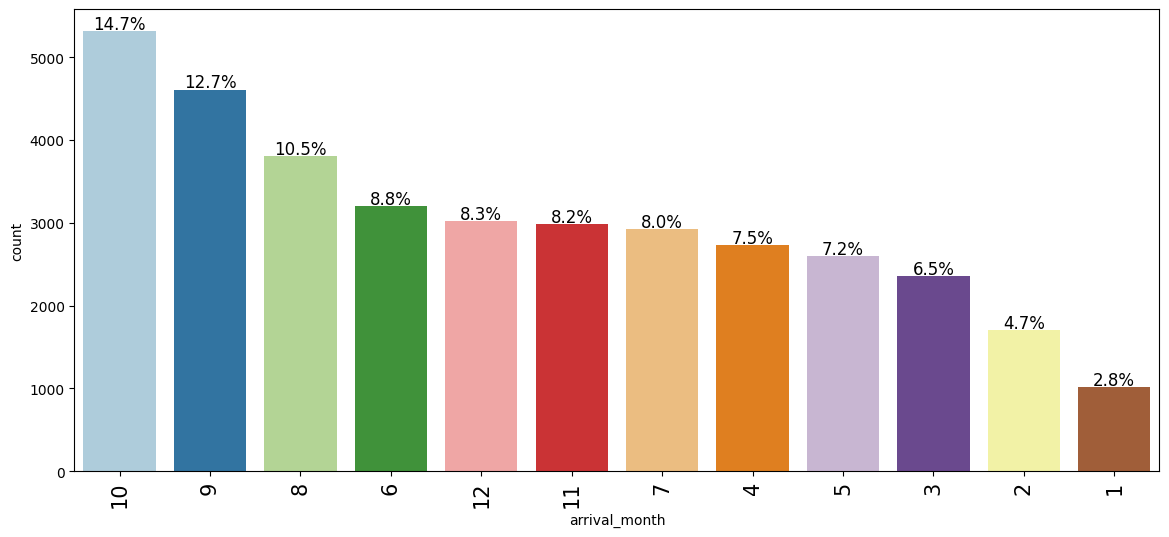

In [ ]:
#response to question 1, busiest months
labeled_barplot(hotel, 'arrival_month')

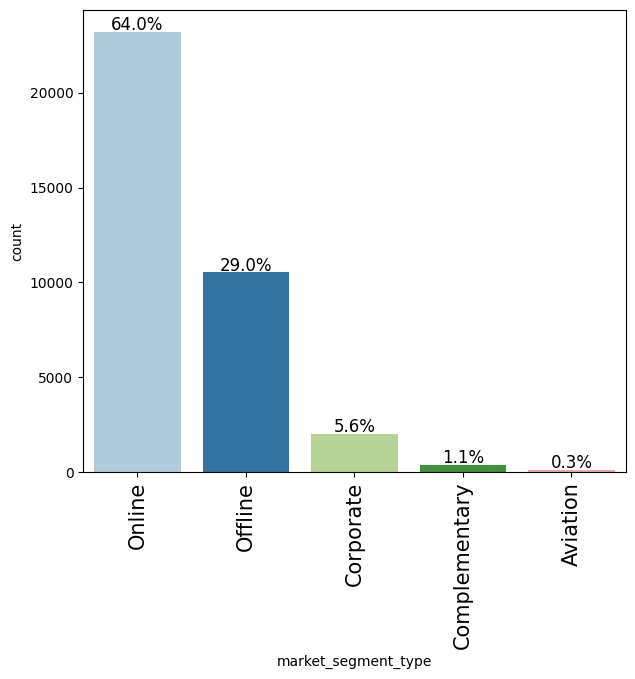

In [ ]:
#response to question 2, how do most customers book their hotel
labeled_barplot(hotel, 'market_segment_type')

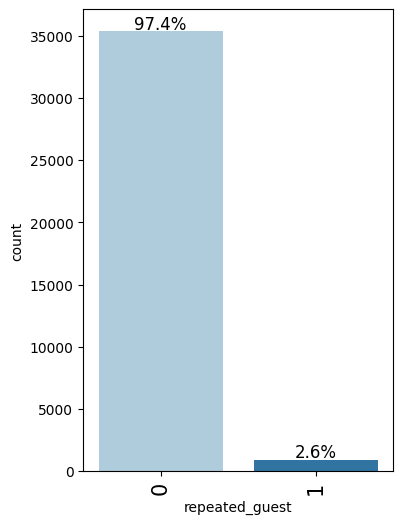

In [ ]:
labeled_barplot(hotel, 'repeated_guest')

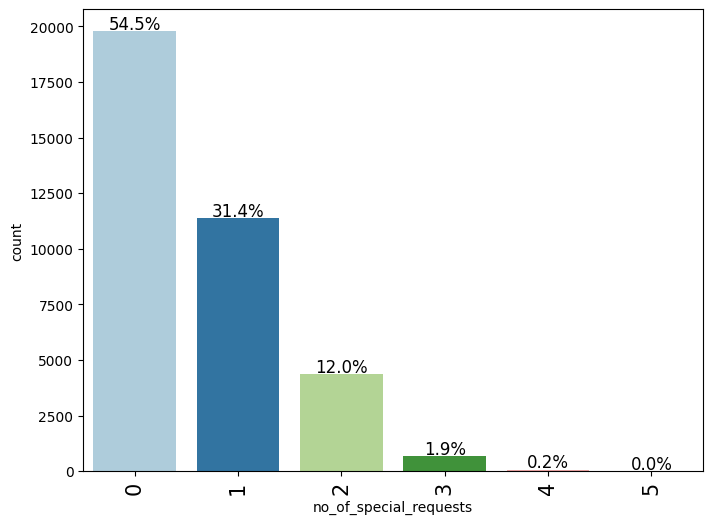

In [ ]:
labeled_barplot(hotel, 'no_of_special_requests')

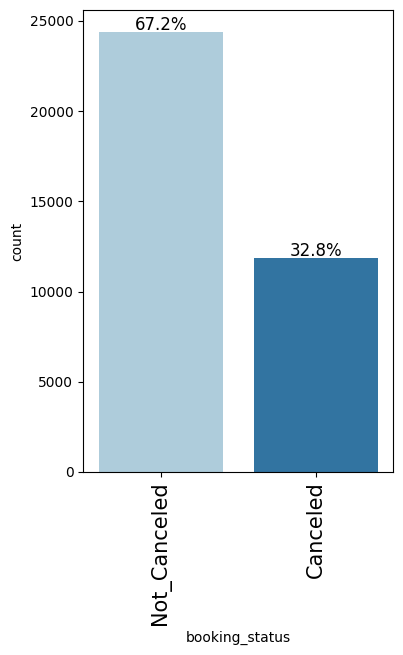

In [ ]:
#response to question 4, percent of cancellations
labeled_barplot(hotel, 'booking_status')

### Bivariate Analysis
*See below for responses to questions 3, 5, & 6 as well as investigations into the relationship amongst different columns*
*  The **heat map** displays weak collinearity between variables. The highest correlation values are between repeated_guest & no_of_previous_bookings_not_cancelled (0.54); no_of_previous_cancellations & no_of_previous_bookings_not_cncelled (0.47); lead_time & booking_status (0.44).
* ***Response to Question 3,* relationship between room price and market segment:** We can see in the histograms that offline bookings tend to have a lower average price in comparison to online bookings. Additionally, online bookings have a wider variety of room prices. This makes sense as an online platform can be easily edited to reflect INN Hotel's availability. Aviation market type has the highest priceline, as 75% of the prices are greater than the majority of Offline and Corporate pricing. We also see that the 0-values of room price mostly come from Complementary markets; customers likely had some sort of deal to get these bookings-- we are no longer concerned about 0's for avg_price_per_room.
* ***Response to Question 5,* repeated guests and booking status:** the stacked barplot shows that a repeated guest is less likely to cancel a booking than a new customer. More than 60% of non-repeat guests show booking cancellations in the data.
* **Arrival Month and Booking Status:** Guests are less likely to cancel in January & December, and most likely to cancel in July & June.
* ***Response to question 6,* special requests and booking status:** The most special requests from a guest, the less likely they are to cancel. This makes sense because, if a customer knows INN Hotels can accommodate their requests, they are more likely to look forward to their trip. This is supported in the stacked barplot where we can observe a significant decrease in cancellations when comparing no requests to 1 request (~56% don't cancel with no special request, whereas ~75% don't cancel with 1 special request). No guests cancel when there are 3 or more special requests in their booking information.
* **Average price per room and special requests:** the spread of price for different request levels shows that guests who have 2 special requests have the highest variety in price.
* **Average price per room and number of adults:** The more adults in a booking, the more expensive a room. This makes sense as the rooms will be larger for bigger parties. When 1-2 adults are in a booking, the price of a room is very similar.
* **Average price per room and booking status:** the median price of bookings that end up being cancelled is > 100 euros, whereas the median price of bookings that do not get cancelled is  less than 100 euros.
* **Lead time and booking status:** the further in advance a hotel is booked, the higher chance of it being cancelled. 50% of cancelled bookings occur when the lead time is greater than 100 days.


In [ ]:
#copy data
hotel_checks = hotel.copy()
#one-hot depdendent variable
hotel_checks['booking_status'] = hotel_checks['booking_status'].apply(lambda x: 1 if x=='Canceled' else 0)

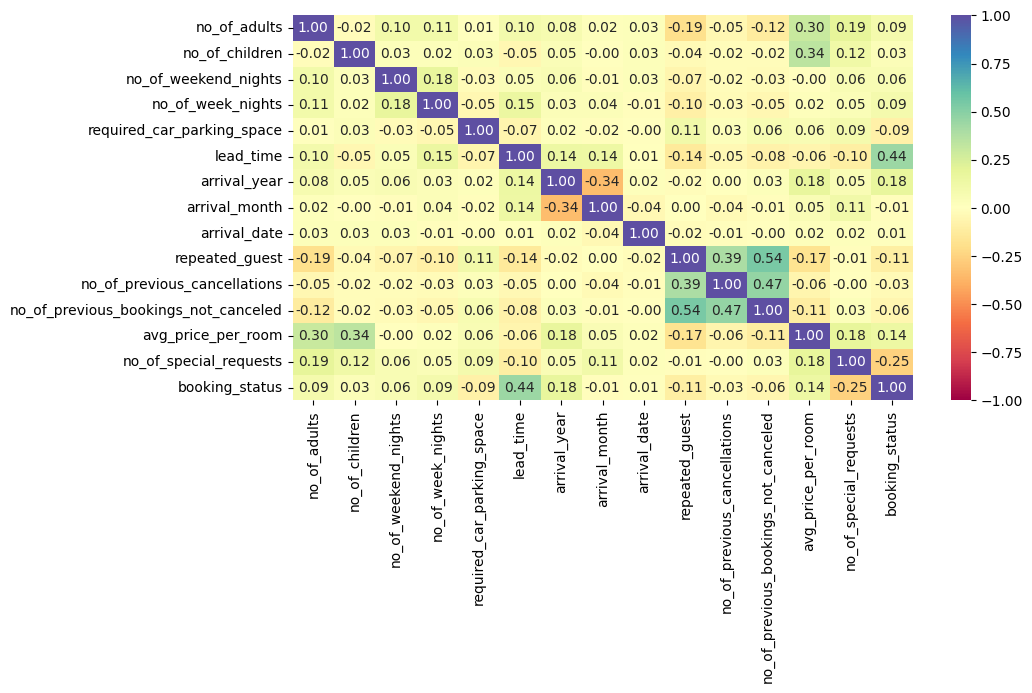

In [ ]:
#create heatmap to inspire investiagation tactics
cols = hotel_checks.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 5))
sns.heatmap(hotel_checks[cols].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

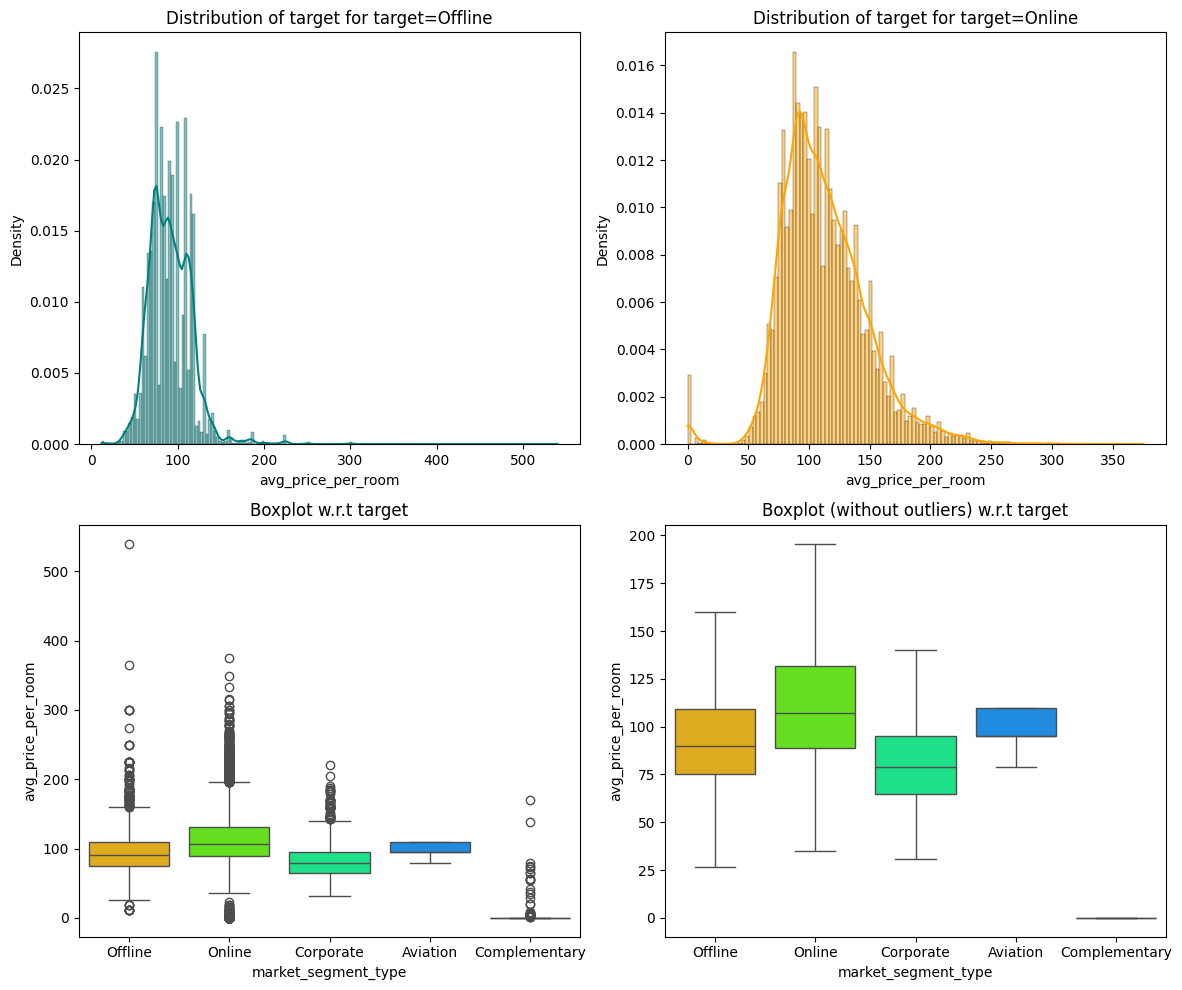

In [ ]:
#question 3, room price wrt market type
distribution_plot_wrt_target(hotel_checks, 'avg_price_per_room', 'market_segment_type')

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


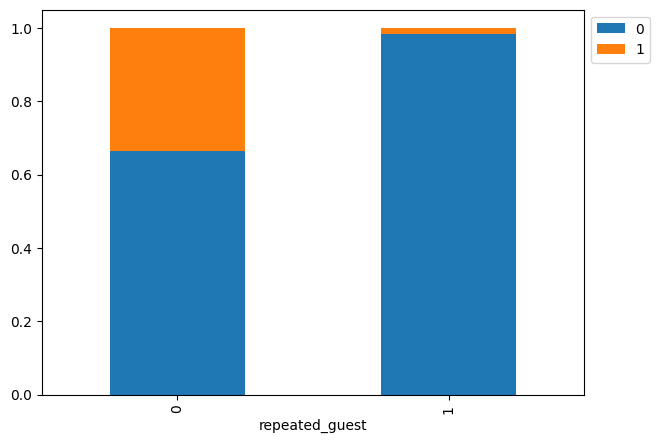

In [ ]:
#question 5, repeat guests that cancel
stacked_barplot(hotel_checks, 'repeated_guest', 'booking_status')

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


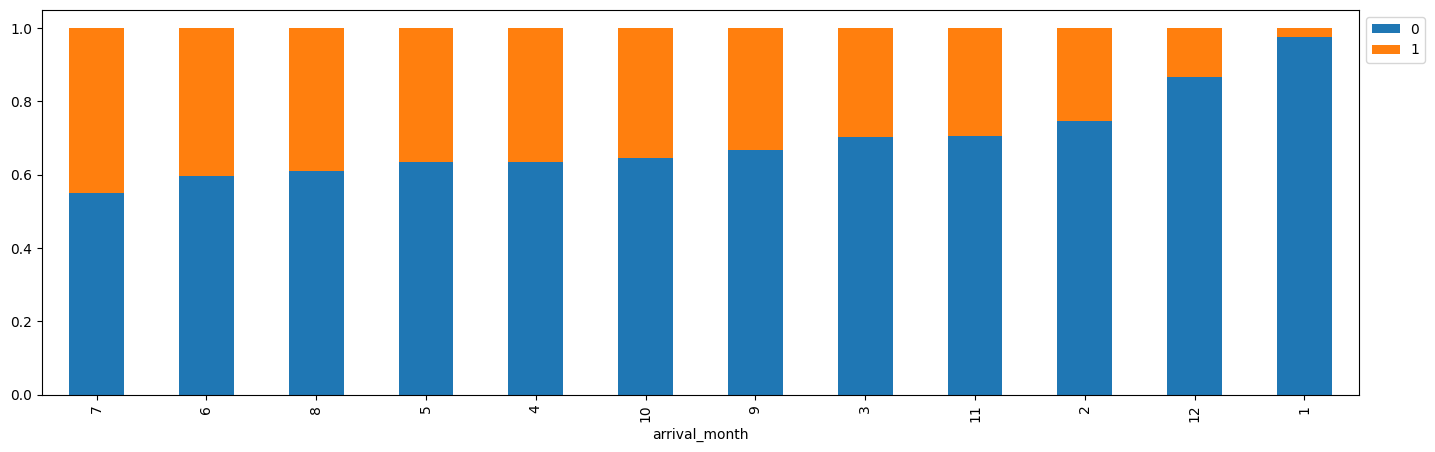

In [ ]:
stacked_barplot(hotel_checks, 'arrival_month', 'booking_status')

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


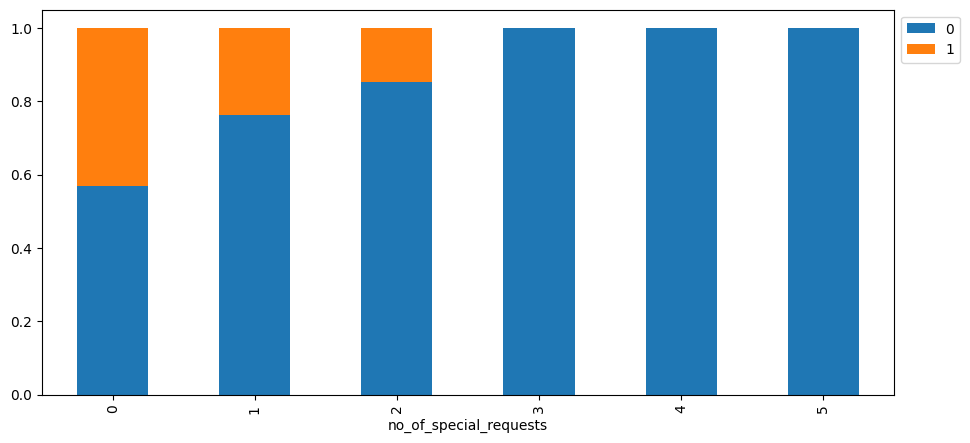

In [ ]:
#question 6, request vs. booking status
stacked_barplot(hotel_checks, 'no_of_special_requests', 'booking_status')

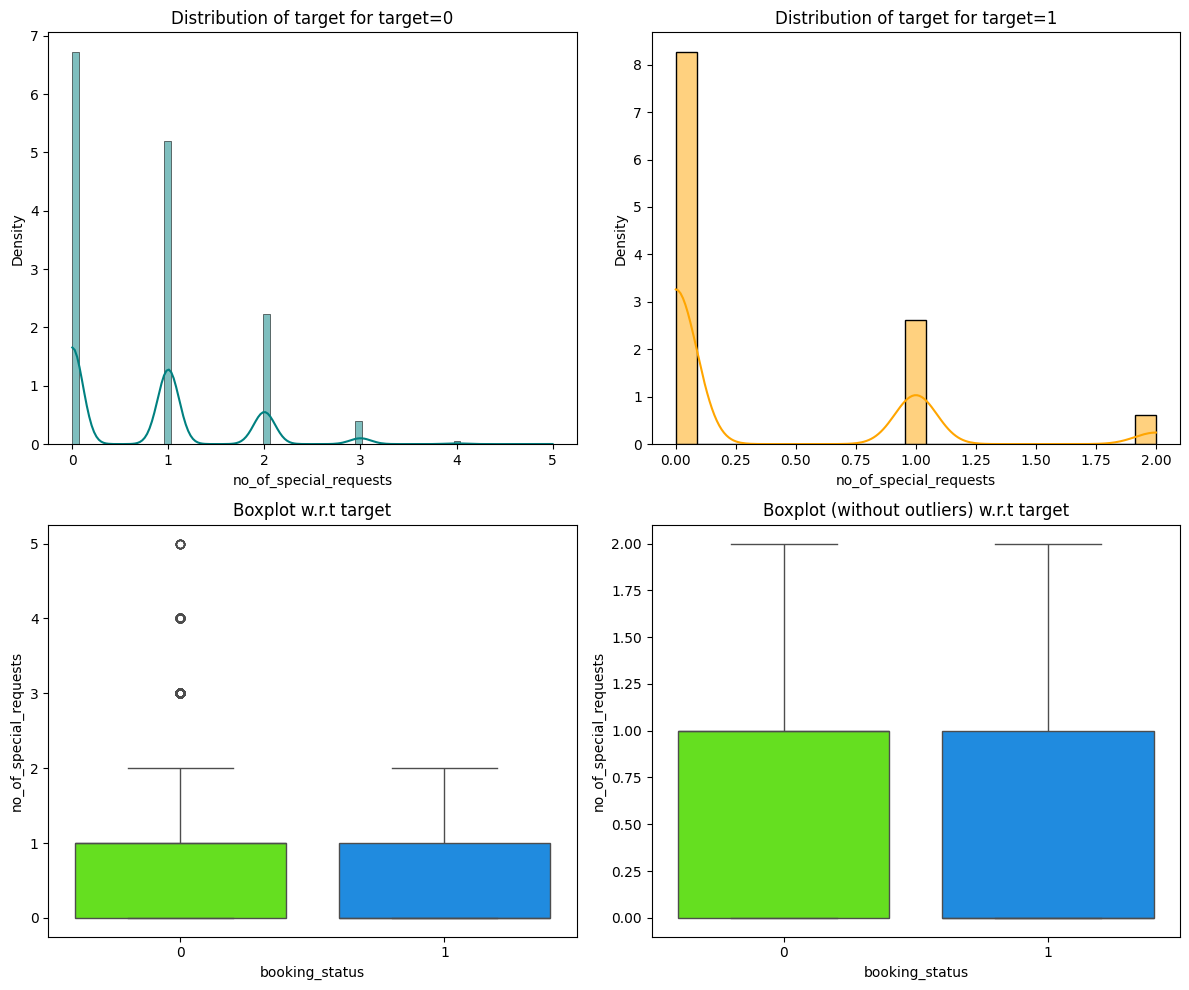

In [ ]:
#question 6 continued, request and status
distribution_plot_wrt_target(hotel_checks, 'no_of_special_requests', 'booking_status')

<Axes: xlabel='avg_price_per_room'>

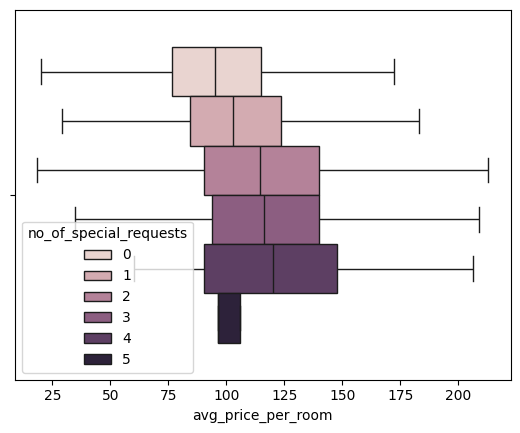

In [ ]:
sns.boxplot(hotel_checks, x='avg_price_per_room', hue='no_of_special_requests', showfliers=False)

<Axes: xlabel='avg_price_per_room'>

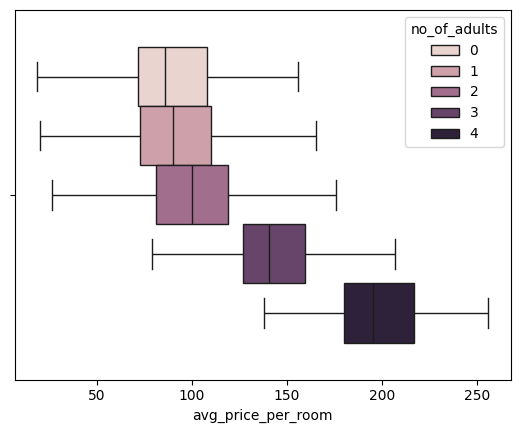

In [ ]:
sns.boxplot(hotel_checks, x='avg_price_per_room', hue='no_of_adults', showfliers=False)

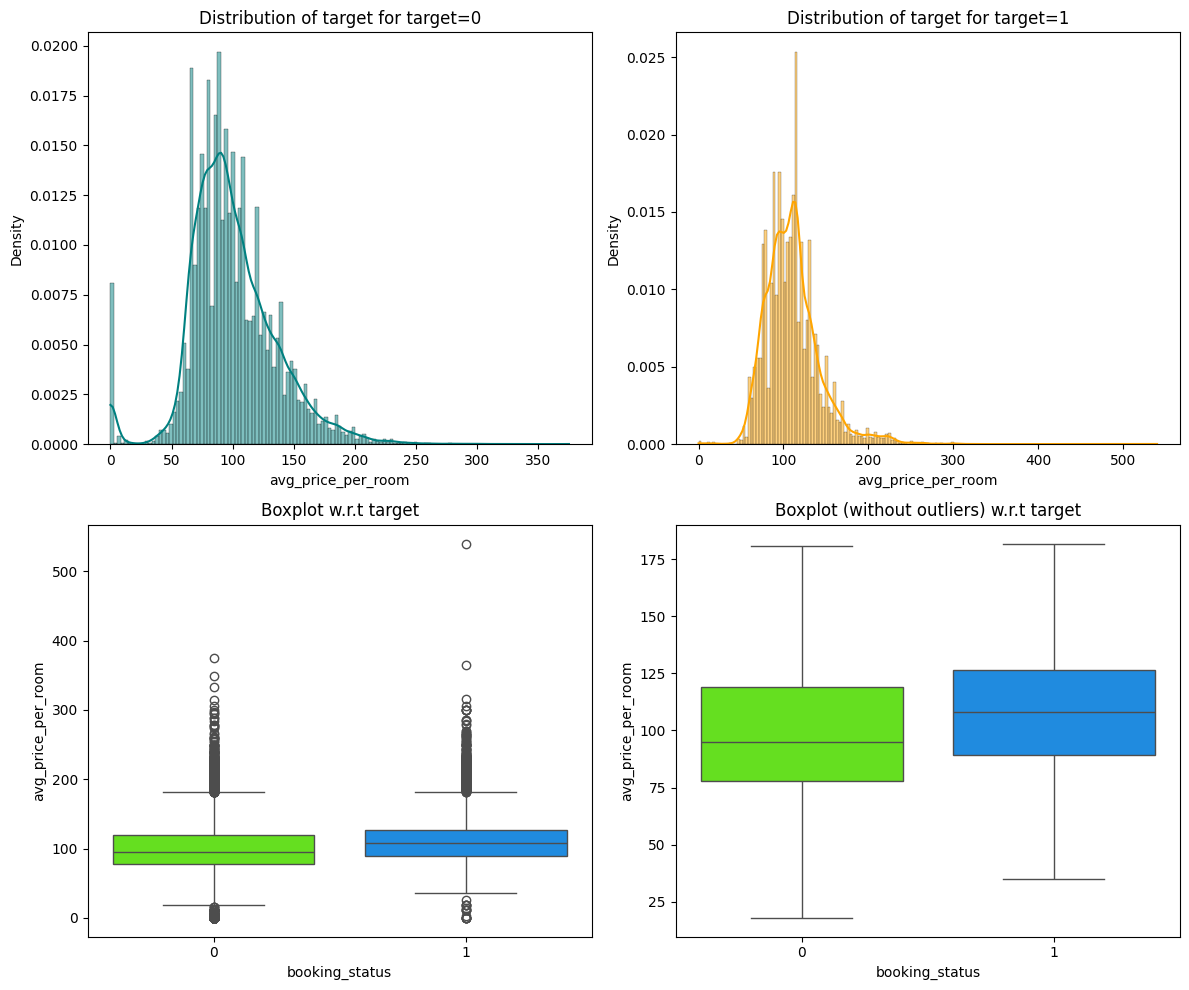

In [ ]:
distribution_plot_wrt_target(hotel_checks, 'avg_price_per_room', 'booking_status')

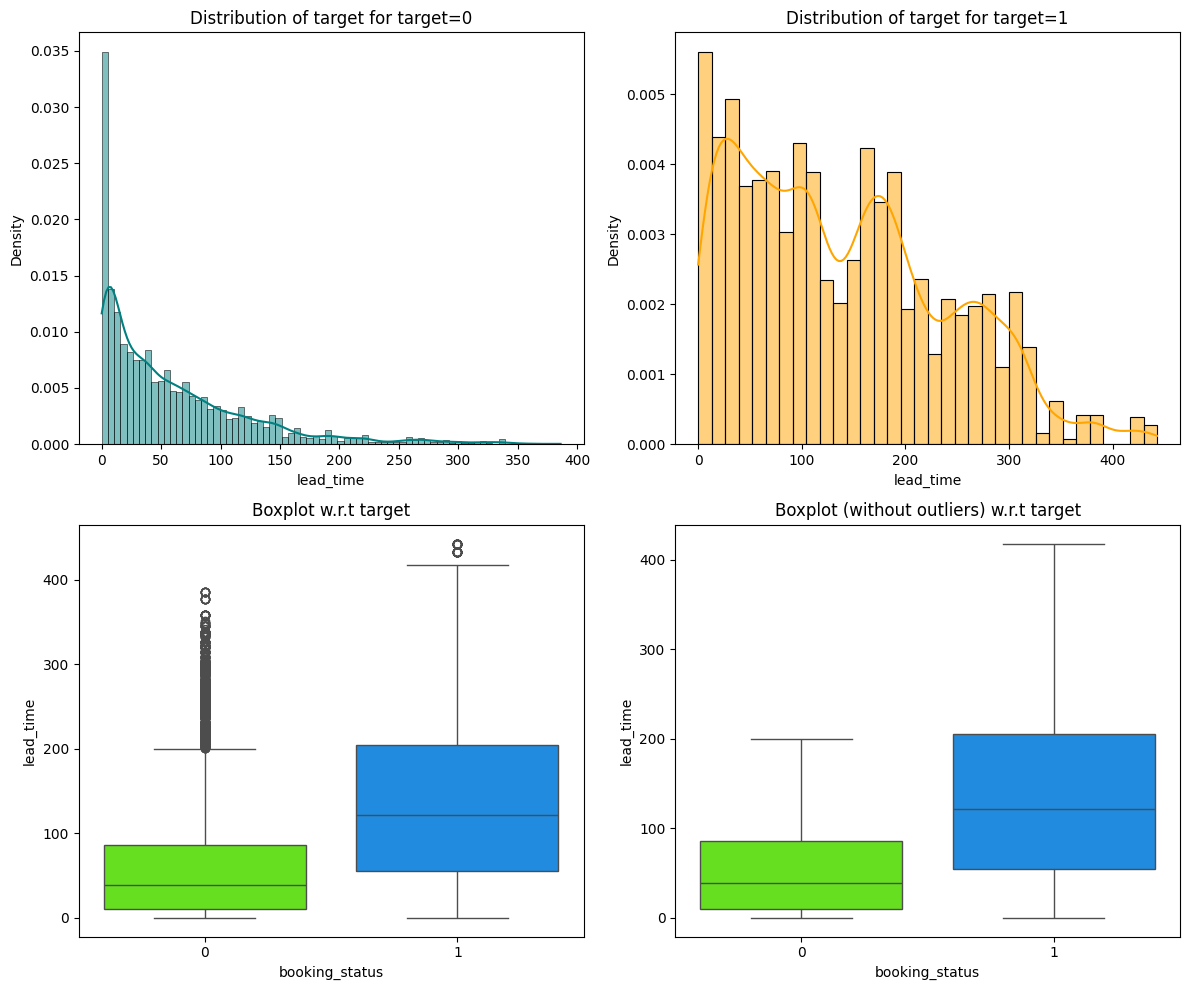

In [ ]:
distribution_plot_wrt_target(hotel_checks, 'lead_time', 'booking_status')

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering ~(if needed)~
- Outlier detection and treatment ~(if needed)~
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###Imputations for 0's in Data / Missing
As seen in the EDA section, there are approx. 100 instances where number of adults in a booking is 0. We will edit these values to be NaN, as it doesn't make sense for no adults to be present for a booking. This allows us to acknowledge missing data without treating them as 0-values.
  With the missing values treated, we will impute **no_of_adults** with the median value (2), as our EDA boxplot shows us this is the most common value of adults in bookings.

In [ ]:
#copy data to begin preprocessing
data = hotel_checks.copy()
#define the columns where 0 replaced with NaN
nan_col = ['no_of_adults']

In [ ]:
#replace 0 with Nan
data[nan_col] = data[nan_col].replace(0, np.nan)

In [ ]:
#check missing values
data.isna().sum()

no_of_adults                            139
no_of_children                            0
no_of_weekend_nights                      0
no_of_week_nights                         0
type_of_meal_plan                         0
required_car_parking_space                0
room_type_reserved                        0
lead_time                                 0
arrival_year                              0
arrival_month                             0
arrival_date                              0
market_segment_type                       0
repeated_guest                            0
no_of_previous_cancellations              0
no_of_previous_bookings_not_canceled      0
avg_price_per_room                        0
no_of_special_requests                    0
booking_status                            0
dtype: int64

In [ ]:
#impute NaN with median values
data[nan_col] = data[nan_col].fillna(data[nan_col].median())

In [ ]:
#check missing values of the data again
data.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Outlier Detection
We can observe below that the outliers displayed are proper values. We know that we have aalready treated extreme cases of 0's that were displayed as outliers in our EDA section. We will not edit the data further.
- Note: There are extreme values for *avg_price_per_room*, but INN Hotels may have luxury settings or discounted rates that explain such prices (example, Honeymoon suites, wedding packages for guests). We have also seen in the EDA section that INN Hotles has offered many market_segment_type 'Complementary,' which would explain the 0 euro prices.

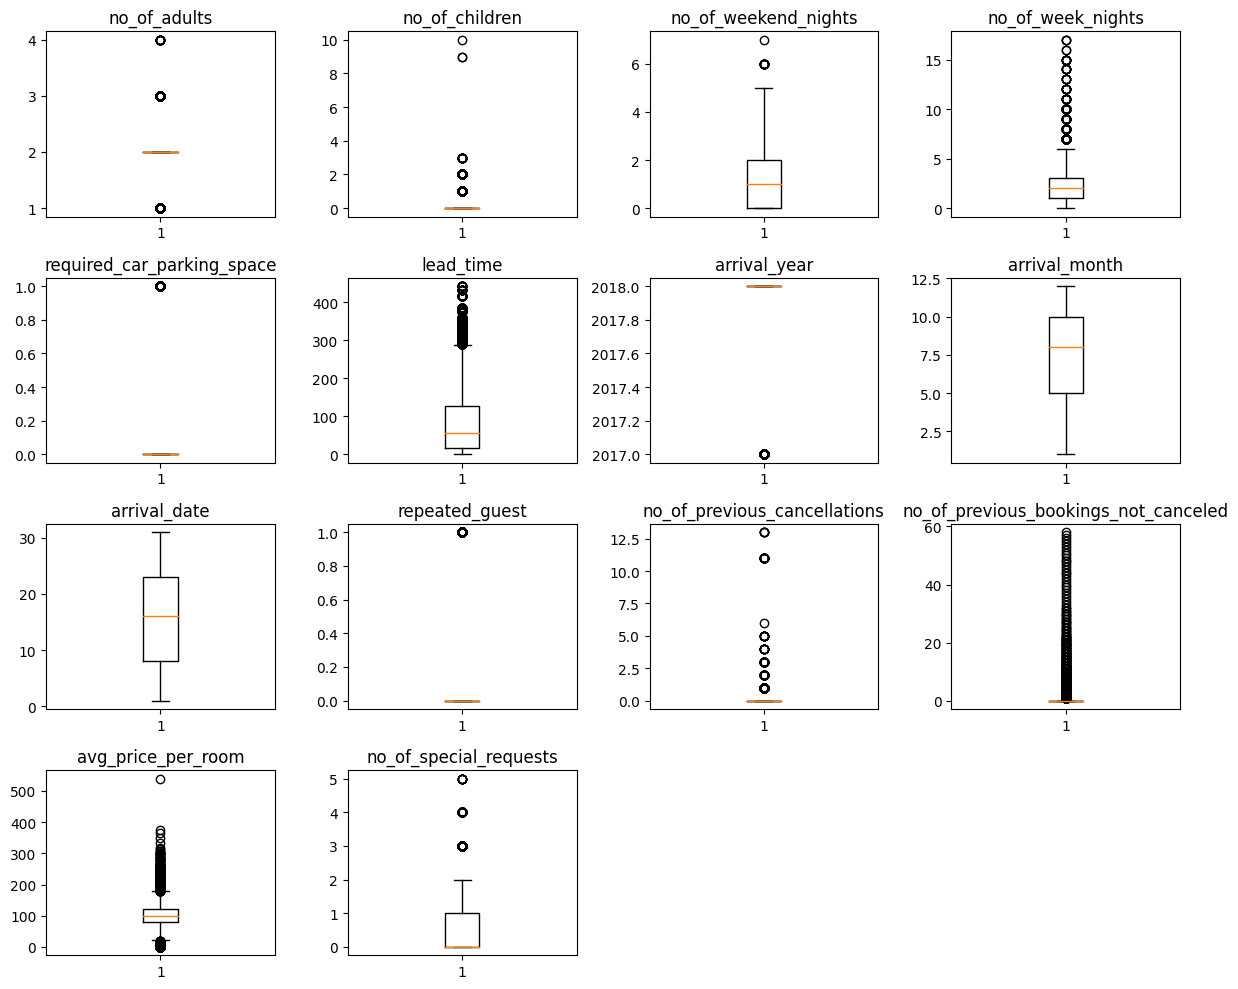

In [ ]:
#creat boxplots to observe outliers
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
#ignore dependent variable
numerical_col.remove('booking_status')

plt.figure(figsize=(12, 10))

for i, variable in enumerate(numerical_col):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation
We will copy the data to use for our Logistic Regression (and apply this to Decision Tree). We will denote the predictor variables and depdendent variable. We will create dummy variables.
- Note: Label Encoding was applied to meal plans as the choices are more/less complex in comparison to one another

In [ ]:
#create copy
log_data = data.copy()

In [ ]:
#label encoding for heirarchy of meal plans
meal_options = {'type_of_meal_plan': {'Not Selected':0, 'Meal Plan 1': 1, 'Meal Plan 2':2, 'Meal Plan 3': 3}}
#simple dummy variables
one_hots = ['room_type_reserved', 'market_segment_type']

In [ ]:
#apply label encoding for meal type
log_data = log_data.replace(meal_options)
log_data.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.00000,0,1,2,1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2.00000,0,2,3,0,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1.00000,0,2,1,1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2.00000,0,0,2,1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2.00000,0,1,1,0,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1
5,2.00000,0,0,2,2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00000,1,1
6,2.00000,0,1,3,1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55000,1,0
7,2.00000,0,1,3,1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61000,1,0
8,3.00000,0,0,4,1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90000,1,0
9,2.00000,0,0,5,1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44000,3,0


In [ ]:
#apply dummies for other categorical columns
log_data = pd.get_dummies(log_data, columns=one_hots, drop_first=True)
log_data.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.00000,0,1,2,1,0,224,2017,10,2,0,0,0,65.00000,0,0,False,False,False,False,False,False,False,False,True,False
1,2.00000,0,2,3,0,0,5,2018,11,6,0,0,0,106.68000,1,0,False,False,False,False,False,False,False,False,False,True
2,1.00000,0,2,1,1,0,1,2018,2,28,0,0,0,60.00000,0,1,False,False,False,False,False,False,False,False,False,True
3,2.00000,0,0,2,1,0,211,2018,5,20,0,0,0,100.00000,0,1,False,False,False,False,False,False,False,False,False,True
4,2.00000,0,1,1,0,0,48,2018,4,11,0,0,0,94.50000,0,1,False,False,False,False,False,False,False,False,False,True
5,2.00000,0,0,2,2,0,346,2018,9,13,0,0,0,115.00000,1,1,False,False,False,False,False,False,False,False,False,True
6,2.00000,0,1,3,1,0,34,2017,10,15,0,0,0,107.55000,1,0,False,False,False,False,False,False,False,False,False,True
7,2.00000,0,1,3,1,0,83,2018,12,26,0,0,0,105.61000,1,0,False,False,True,False,False,False,False,False,False,True
8,3.00000,0,0,4,1,0,121,2018,7,6,0,0,0,96.90000,1,0,False,False,False,False,False,False,False,False,True,False
9,2.00000,0,0,5,1,0,44,2018,10,18,0,0,0,133.44000,3,0,False,False,True,False,False,False,False,False,False,True


In [ ]:
#state depdendent and independent variables
X = log_data.drop(['booking_status'], axis=1)
Y = log_data['booking_status']

In [ ]:
#fix boolean data types
X = X.astype(float)
#check
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.00000,0.00000,1.00000,2.00000,1.00000,0.00000,224.00000,2017.00000,10.00000,2.00000,0.00000,0.00000,0.00000,65.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,2.00000,0.00000,2.00000,3.00000,0.00000,0.00000,5.00000,2018.00000,11.00000,6.00000,0.00000,0.00000,0.00000,106.68000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,1.00000,0.00000,2.00000,1.00000,1.00000,0.00000,1.00000,2018.00000,2.00000,28.00000,0.00000,0.00000,0.00000,60.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,2.00000,0.00000,0.00000,2.00000,1.00000,0.00000,211.00000,2018.00000,5.00000,20.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
4,2.00000,0.00000,1.00000,1.00000,0.00000,0.00000,48.00000,2018.00000,4.00000,11.00000,0.00000,0.00000,0.00000,94.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [ ]:
#add constant
X = sm.add_constant(X)
#create training and testing sets
# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 26)
Shape of test set :  (10883, 26)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


The above information regarding shapes of train / test sets shows us that the ratio of Not_Canceled=0 vs Canceled=1 observed in the EDA section has been correctly applied to our data split. (Original ratio: Canceled 32.8%, Not Canceled 67.2%)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
#check data columns where medians were imputed
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.85263,0.50602,1.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


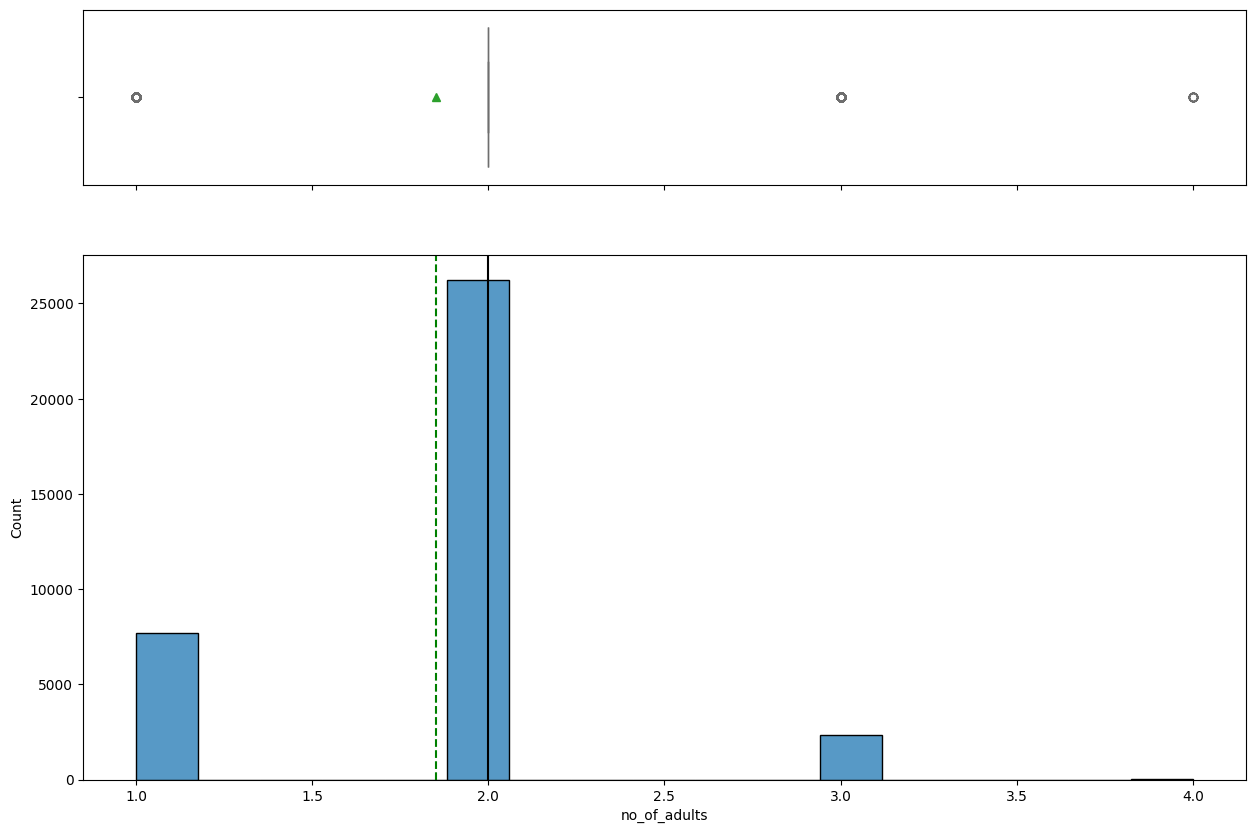

In [ ]:
histogram_boxplot(data, 'no_of_adults')

## Building a Logistic Regression model
- *We will focus on the F1_Score performance metric,* as we want a balance between Recall and Precision Scores. We want to maximize the TPR & TNR (aka minimize False Negatives/positives) in order to predict situations where INN Hotels:
1. Expects a booking to be cancelled, but it is not (loss of customer satisfaction / loyalty when expecting the worst-- False Positive).
2. Expects a booking to not be cancelled, but it is (loss of revenue / must discount room to sell it in time for a night-- False Negative).

### Apply shared functions for performance / matrices

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Begin Log. Regress. model

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train)
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Thu, 30 May 2024   Pseudo R-squ.:                  0.3284
Time:                        16:55:11   Log-Likelihood:                -10807.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -856.0721    119.547     -7.161      0.000   -1090.380    -621.764
no_of_adults                             0.1338      

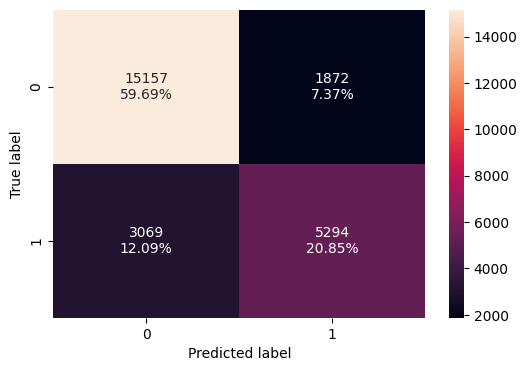

In [ ]:
#check matrix
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
#performance training
print('Training Performance:')
model_performance_classification_statsmodels(lg, X_train, y_train)

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63303,0.73877,0.68182


Observations:
- the f1_score of the model is ~0.68. There is room for improvement
- We can improve the model by checking/handling multi-collinearity and high p-values

### Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
#observe VIF scores to begin Multi.Co. checks
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

checking_vif(X_train)

,feature,VIF
0,const,39238751.83565
1,no_of_adults,1.33831
2,no_of_children,1.94241
3,no_of_weekend_nights,1.06778
4,no_of_week_nights,1.08805
5,type_of_meal_plan,1.43374
6,required_car_parking_space,1.03942
7,lead_time,1.38484
8,arrival_year,1.42221
9,arrival_month,1.27476


Observations: the VIF scores are all less than 5, except for dummy variables: corporate, offline, online (market segment types). As these are dummies, we will not react to their high VIF scores.
  We will move forward to check high p-values in the model

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
#save selected features
X_train2 = X_train[selected_features]

In [ ]:
#build updated model
logit2 = sm.Logit(y_train, X_train2)
lg2 = logit2.fit(disp=False)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Thu, 30 May 2024   Pseudo R-squ.:                  0.3274
Time:                        16:55:16   Log-Likelihood:                -10823.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -853.7061    119.255     -7.159      0.000   -1087.441    -619.971
no_of_adults                       0.1290      0.038      3.385      0.

All p-values are less than alpha=0.05. We have corrected multi-collinearity and can move forward to analyze model performance and make further improvements.
*Other Observations:*
- Negative values of the coefficients show a probability of a booking being cancelled decreases as the attribute's value increases. Example: repeated_guest coeff= -2.74 displays that if a guest has used INN Hotels before, they are not likely to cancel their booking.
- Positive values of the coefficients show a probability of a booking being cancelled increases as the attribute's value increases. Example: no_of_adults coeff= 0.1290 displays that the greater number of adults increases likelihood of cancelling their reservation.

In [ ]:
#coefficient explorations
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.13770,1.12845,1.11216,1.03759,0.89681,0.20157,1.01589,1.52453,0.95754,0.06452,1.25348,1.01973,0.22988,0.64526,0.70694,0.46401,0.37329,0.22128,0.43113,0.16818
Change_odd%,-100.00000,13.77042,12.84452,11.21569,3.75878,-10.31917,-79.84318,1.58893,52.45252,-4.24613,-93.54849,25.34841,1.97268,-77.01195,-35.47434,-29.30635,-53.59893,-62.67087,-77.87216,-56.88700,-83.18209


**Coefficient Interpretations:**
- *no_of_adults:* Holding all other features constant a 1 unit change to number of adults in a booking will have 13.7% more odds of cancelling a booking. This makes sense, as more people joining a trip, more changes may occur to various people's schedules, resulting in cancellations.
- *repeated_guest:* Holding all other features constant, being a repeated guest results in a 93.5% decrease in the odds of a booking cancellation. This makes sense as a guest who has used INN Hotels previously knows about their amenities and the dependability of the company. Alternatively, we can see that *no_of_previous_cancellations* displays a pattern that, if a customer has cancelled in the past, the odds of a cancelled booking are 25.3% higher.
- *market_segment_type_offline* and *market_segment_type_corporate* have similar patterns displaying a decrease in the odds of a cancellation.


### Model performance evaluation

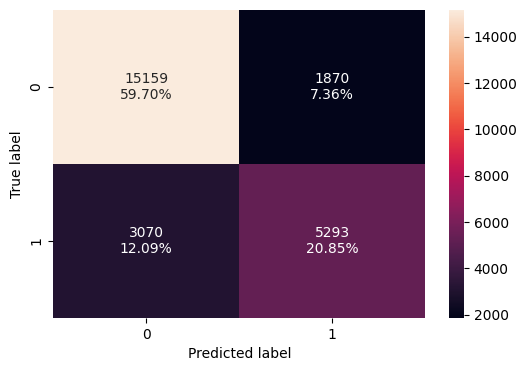

In [ ]:
#check matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [ ]:
#performance training
print('Training Performance:')
log_reg_model_train_perf = model_performance_classification_statsmodels(lg2, X_train2, y_train)
log_reg_model_train_perf

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63291,0.73894,0.68182


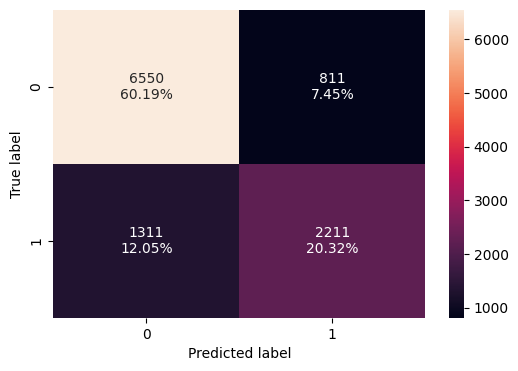

In [ ]:
#apply changes to testing set
X_test2 = X_test[list(X_train2.columns)]
#confusion matrix of test set
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [ ]:
#performance metrics of test set
log_reg_model_test_perf = model_performance_classification_statsmodels(lg2, X_test2, y_test)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80502,0.62777,0.73163,0.67573


Observations:
- The model's f1_scores are similar (train=0.681, test=0.675)
- The performance metrics are comparable between the test and train sets, so our model is not suffering from overfitting.
- Our f1_score can be improved, we would like to see a higher value. We will attempt to adjust the model threshold using ROC curve and area under the curve (AUC). We will also look at the Precision-Recall relationship because we are using f1_score as our significant performance metric.

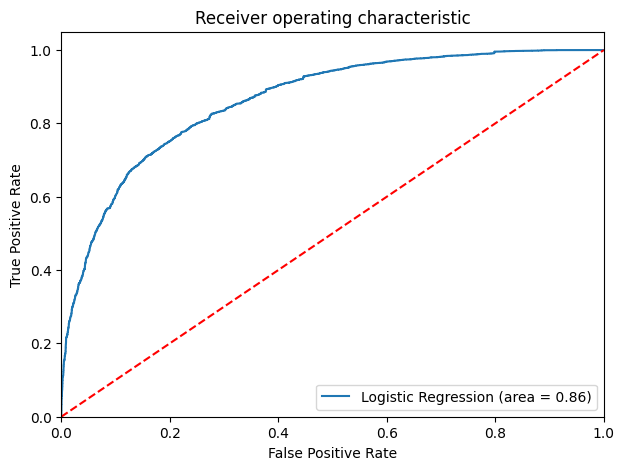

In [ ]:
#ROC-AUC trainging set
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The logistic regression model has a good performance on the training set, as the area under the curve is 86%

In [ ]:
#optimization of true pos rate and true neg rate
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.32119277634168675


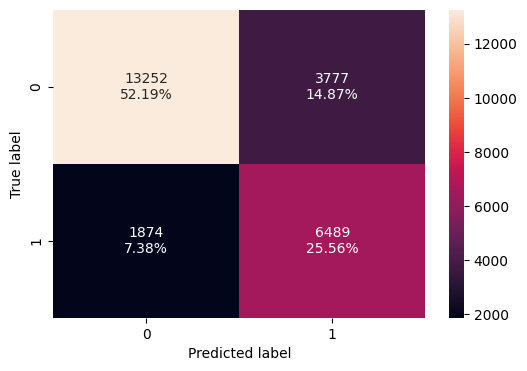

In [ ]:
#confusion matrix using optimal threshold value on train data
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for threshold model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.77745,0.77592,0.63209,0.69666


- The f1_score and recall have improved while other metrics have decreased.
- model is still a good perfromance, will continue by checking test performance

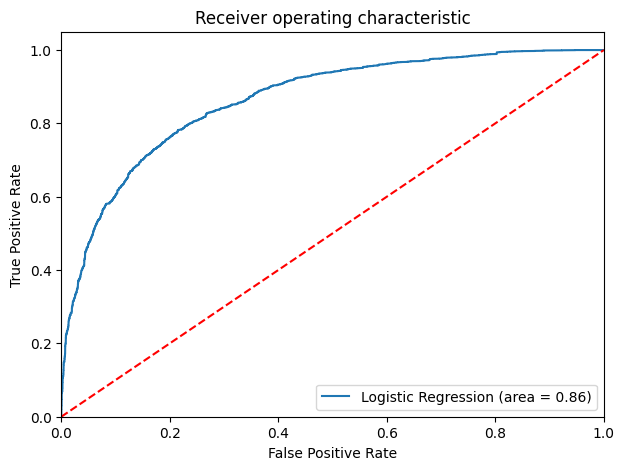

In [ ]:
#visualize curve
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The logistic regression model also has a good performance on the test set, as the area under the curve is 86%

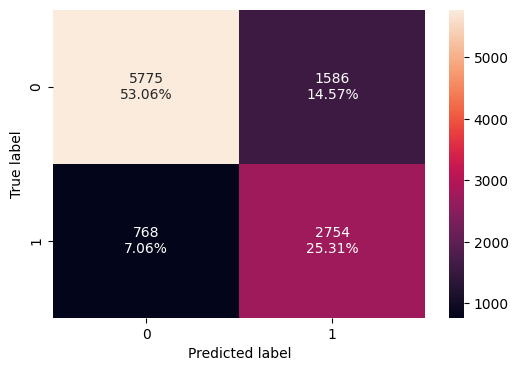

In [ ]:
#test threshold confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
#test model performance optimal threshold
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.78370,0.78194,0.63456,0.70059


Observations:
- The model's f1_scores are similar (train=0.696, test=0.700)
- Recall on test set shows slight increase from 0.77 to 0.78
- The performance metrics are comparable between the test and train sets, so our model is not suffering from overfitting.
- To check any more improvement oppportunities, we will look at the Precision-Recall relationship because we are using f1_score as our significant performance metric.

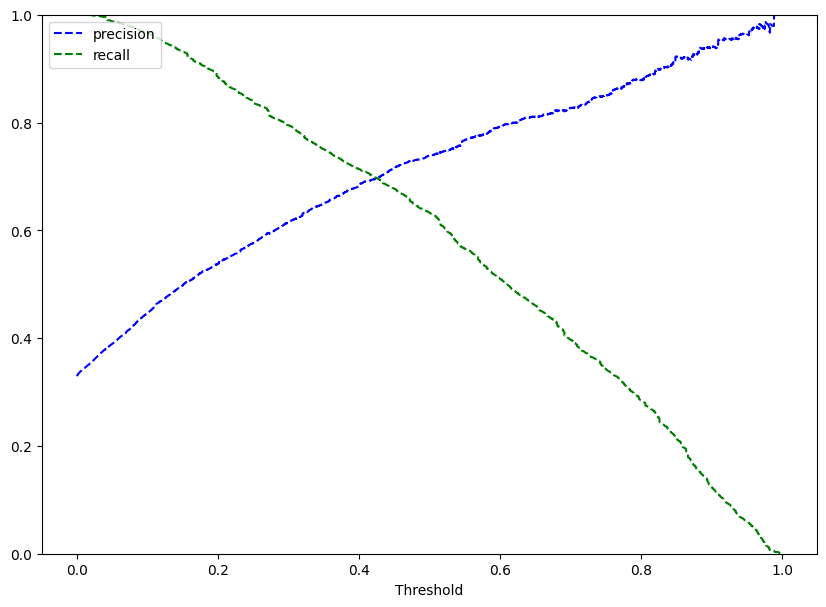

In [ ]:
#plot precision recall relationship
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Reading the graph, we see that precision and recall are balanced around a threshold of approx. 0.43

In [ ]:
#set new threshold value
optimal_threshold_curve = 0.43

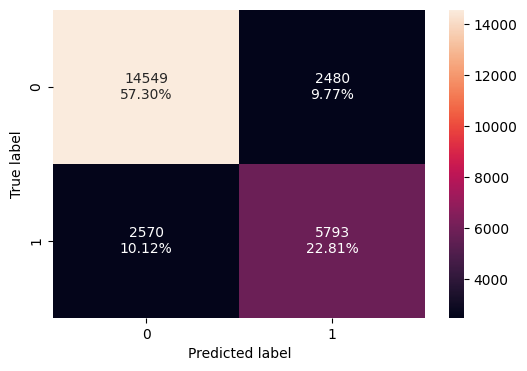

In [ ]:
#new confusion matrix on train set
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [ ]:
#train performance metrics
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80112,0.69269,0.70023,0.69644


- When compared to the ROC-AUC threshold of 0.321, the training metrics show some decreases.
- We will analyze the test data.

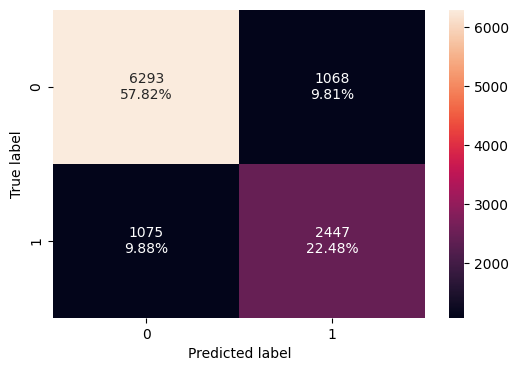

In [ ]:
# test confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [ ]:
#test performance metrics
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80309,0.69478,0.69616,0.69547


- All metrics for optimal_threshold_curve are comparable between test and train sets; we do not suffer from overfitting the data.

### Final Model Summary
We will compare all of our Logistic Regression models and choose the best performance. We will summarize the patterns displayed in our final model

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold-0.50",
    "Logistic Regression-0.321 Threshold",
    "Logistic Regression-0.43 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold-0.50,Logistic Regression-0.321 Threshold,Logistic Regression-0.43 Threshold
Accuracy,0.80545,0.77745,0.80112
Recall,0.63291,0.77592,0.69269
Precision,0.73894,0.63209,0.70023
F1,0.68182,0.69666,0.69644


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold-0.50",
    "Logistic Regression-0.321 Threshold",
    "Logistic Regression-0.43 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold-0.50,Logistic Regression-0.321 Threshold,Logistic Regression-0.43 Threshold
Accuracy,0.80502,0.78370,0.80309
Recall,0.62777,0.78194,0.69478
Precision,0.73163,0.63456,0.69616
F1,0.67573,0.70059,0.69547


- The three models perform well on test and train data. The model that is most likely overfitting the INN Hotel data our default model because it had the largest f1_score decrease between test and train sets. The ROC-AUC model has the improvements in performance when comparing train and test data. The model generalizes on unseen data quite well.
- The model with threshold of ~0.321 (obtained from ROC-AUC process) displays the highest f1_score on both test and train sets: 0.69 train and 0.70 test. **Therefore, our final model uses threshold_auc_roc**

## Building a Decision Tree model
We will repeat the process of creating our predictor and target sets (X & Y), however, we will not add a constant to the data for our tree.
- **We will continue to focus on the F1_Score performance metric,** as we want a balance between Recall and Precision Scores. We want to maximize the TPR & TNR in order to avoid situations where INN Hotels:
1. Expects a booking to be cancelled, but it is not (loss of customer satisfaction / loyalty when expecting the worst-- False Positive).
2. Expects a booking to not be cancelled, but it is (loss of revenue / must discount room to sell it in time for a night-- False Negative).

In [ ]:
#create training and testing sets
#state depdendent and independent variables
X = log_data.drop(['booking_status'], axis=1)
Y = log_data['booking_status']
#fix boolean data types
X = X.astype(float)
#check data
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.00000,0.00000,1.00000,2.00000,1.00000,0.00000,224.00000,2017.00000,10.00000,2.00000,0.00000,0.00000,0.00000,65.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,2.00000,0.00000,2.00000,3.00000,0.00000,0.00000,5.00000,2018.00000,11.00000,6.00000,0.00000,0.00000,0.00000,106.68000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,1.00000,0.00000,2.00000,1.00000,1.00000,0.00000,1.00000,2018.00000,2.00000,28.00000,0.00000,0.00000,0.00000,60.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,2.00000,0.00000,0.00000,2.00000,1.00000,0.00000,211.00000,2018.00000,5.00000,20.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
4,2.00000,0.00000,1.00000,1.00000,0.00000,0.00000,48.00000,2018.00000,4.00000,11.00000,0.00000,0.00000,0.00000,94.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [ ]:
# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
#check ratios of data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 25)
Shape of test set :  (10883, 25)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


The train and test sets have similar proportions to our Canceled // Not_Canceled information of booking status seen in EDA section. We can move forward.

In [ ]:
#create default tree (most complex)
model_start = DecisionTreeClassifier(random_state=1)
model_start.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Import shared functions to check performance metrics

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Evaluation of Default Model

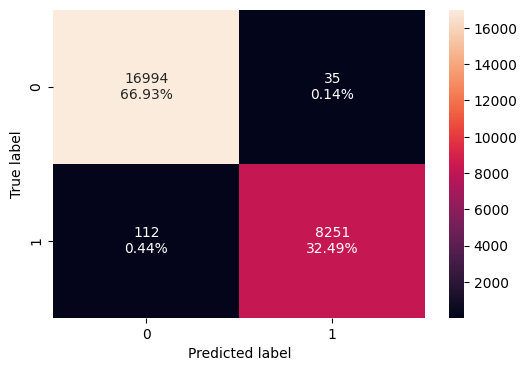

In [ ]:
#matrix of default train
confusion_matrix_sklearn(model_start, X_train, y_train)

In [ ]:
#metrics of default train
decision_tree_perf_train_default = model_performance_classification_sklearn(model_start, X_train, y_train)
decision_tree_perf_train_default

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


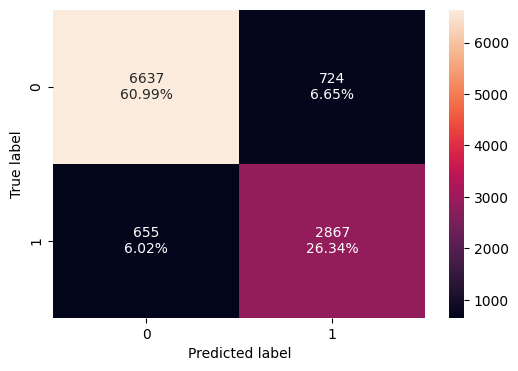

In [ ]:
#matrix of default model on test data
confusion_matrix_sklearn(model_start, X_test, y_test)

In [ ]:
#metrics on default model test data
decision_tree_perf_test_default = model_performance_classification_sklearn(model_start, X_test, y_test)
decision_tree_perf_test_default

,Accuracy,Recall,Precision,F1
0,0.87329,0.81403,0.79838,0.80613


- There more than a 10% decrease in all performance metrics when comparing the train and test sets.
- This shows us our default model, which is the most complex decision tree, is suffering from over fitting our data.

### Do we need to prune the tree?
Yes. As stated above, our matrices and performance metrics show that while our model performs well on the training data, there is a substantial increase of errors when applied to the test set. This tells us our model is overfitting the INN Hotels data. We will attempt pre and post pruning methods and compare our best Decision Trees.

### Pre-Pruning of Decision Tree.
- Apply GridSearchCV to test different hyperparameters and find best instructions/limitations of our tree.

In [ ]:
# Choose the type of classifier.
preprune_model = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(preprune_model, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
preprune_model = grid_obj.best_estimator_

# Fit the best algorithm to the data.
preprune_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

The hyperparameters chosen by our GridSearchCV lead us to work with a Decision Tree that:
- has balanced class weights
- max depth of 6
- max nodes = 50
- minimum samples in split = 10

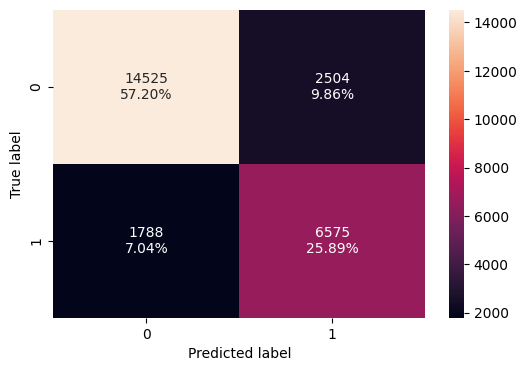

In [ ]:
#check preprune train matrix
confusion_matrix_sklearn(preprune_model, X_train, y_train)

In [ ]:
#check metrics of preprune train
decision_tree_tune_perf_train = model_performance_classification_sklearn(preprune_model, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78620,0.72420,0.75393


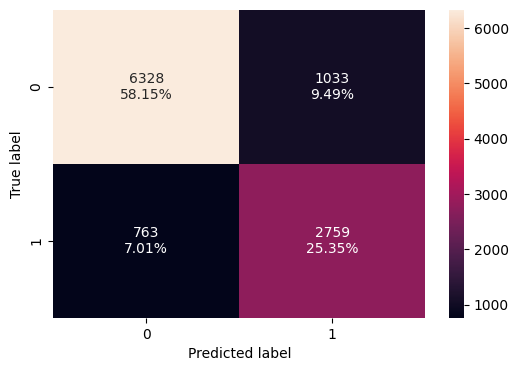

In [ ]:
#check preprune test matrix
confusion_matrix_sklearn(preprune_model, X_test, y_test)

In [ ]:
#check metrics of preprune test
decision_tree_tune_perf_test = model_performance_classification_sklearn(preprune_model, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


- the performance metrics of the pre-pruned decision tree on test and train data are comparable. This shows us that we have improved the over-fitting conflict.
- in comparison to the test f1_score on the default tree, we see a decrease. However, our model is much better due to the fact that it performs similarly on the train and test sets.

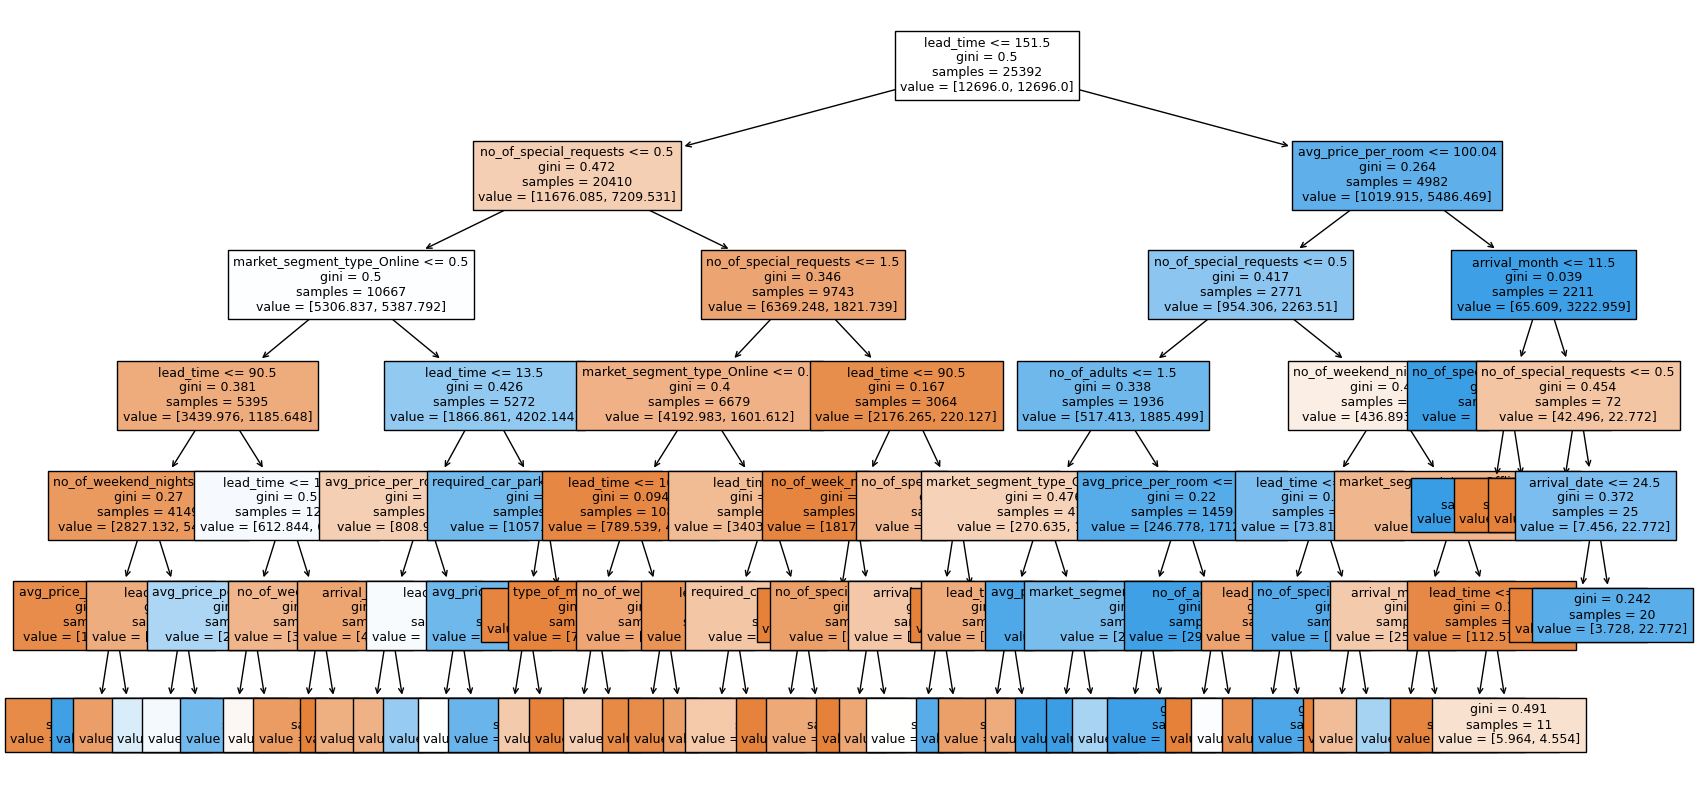

In [ ]:
#observe importance of predictors in prepruned tree
#visualize the preprune decision tree
importances = preprune_model.feature_importances_
indices = np.argsort(importances)

feature_names = list(X_train.columns)

plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    preprune_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# add arrows to the decision tree split
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(preprune_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

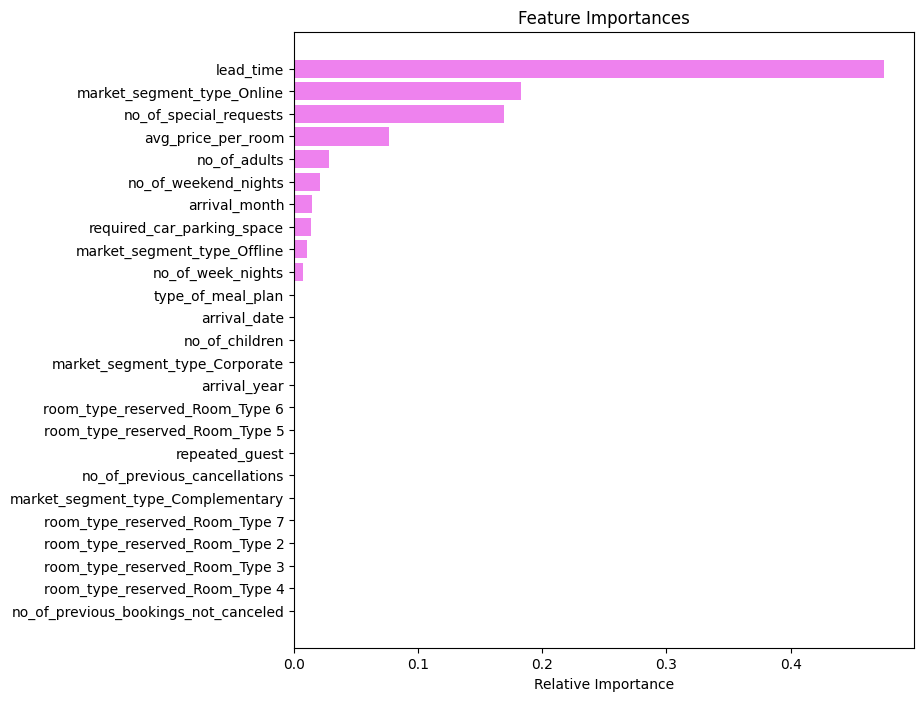

In [ ]:
#display importances
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations of Pre-Pruned Tree:**
- Decision rules allow us to make interpretations such as... "If the lead time is less than or eaqual to 151.5 days, special request is less than or equal to 0.5 (no requests), market segment online less than or equal to 0.5 (not booked online), lead time is less than or equal to 90.5 days, number of weekend nights is less than or equal to 0.5 (no weekend nights), average room price is greater than 196.50 euros, then the reservation is likely to be cancelled."
- *other decisions can be verbalized from reading tree. class:1 implies cancelled booking, class: 0 implies not cancelled.*
- The 3 most important factors in construction of our Pre-Pruned tree are: lead time, special requests, market segment Online,


### Post-Pruning Decision Tree
We will work with the cost complexity parameter ccp_alpha to build a tree then work backwards to identify nodes that can be removed. We will view impurities and ccp_alphas; the higher our alpha value, the more post-pruning occurs.

In [ ]:
#begin decision tree
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
#view ccp_alphs and impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1858,0.00890,0.32806
1859,0.00980,0.33786
1860,0.01272,0.35058
1861,0.03412,0.41882


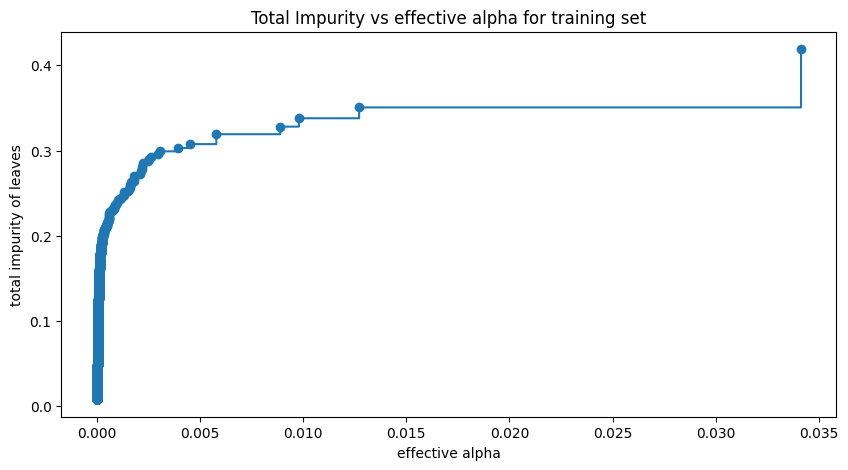

In [ ]:
#plot impurity compared to alpha
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
#train tree with effective alphas
#view number of nodes in last tree + ccp_alpha at that state
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137115


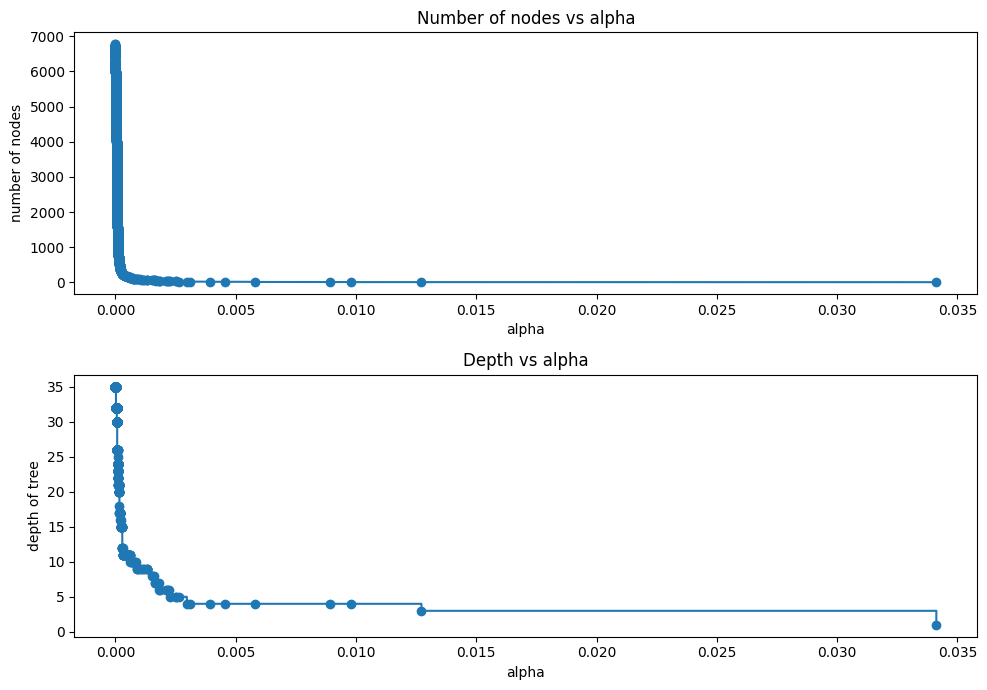

In [ ]:
#display number fo nodes and tree depth as alpha value grows
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
#gather f1_scores as alpha changes in train set
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [ ]:
#gather f1_scores as alpha changes in the test set
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

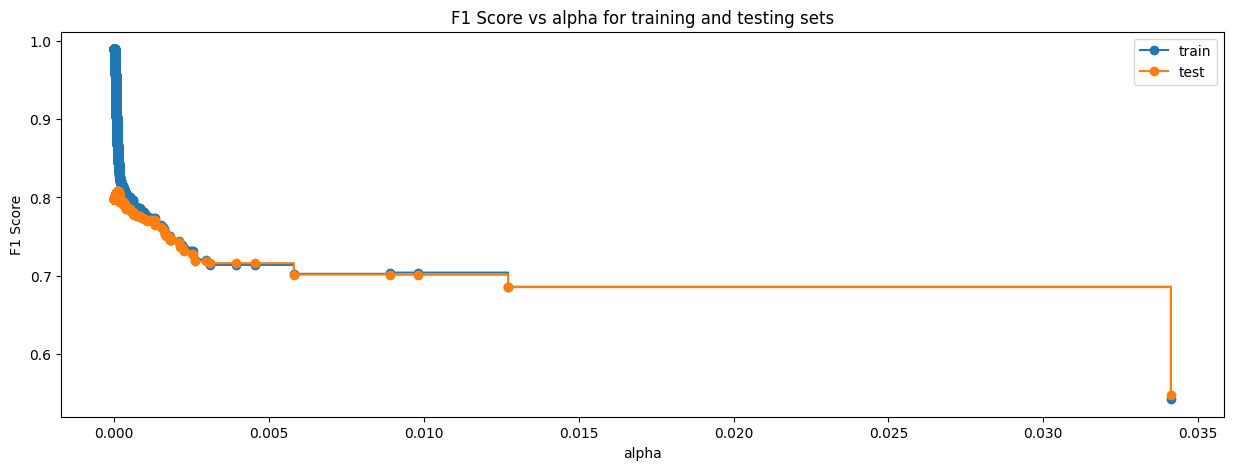

In [ ]:
#plot to compare scores of test and train as alpha increase
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00013338844575845268,
                       class_weight='balanced', random_state=1)


In [ ]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00013338844575845268,
                       class_weight='balanced', random_state=1)

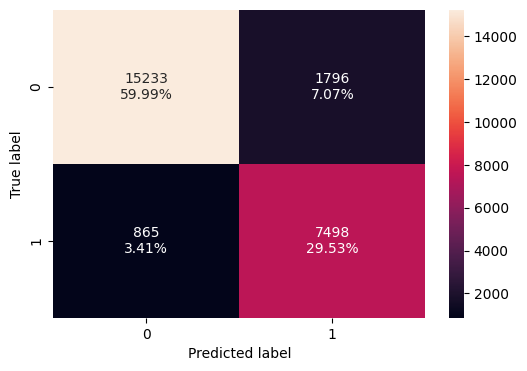

In [ ]:
#apply ccp_alpha value to train
#check matrix
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
#performance metrics of train set
decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89520,0.89657,0.80676,0.84929


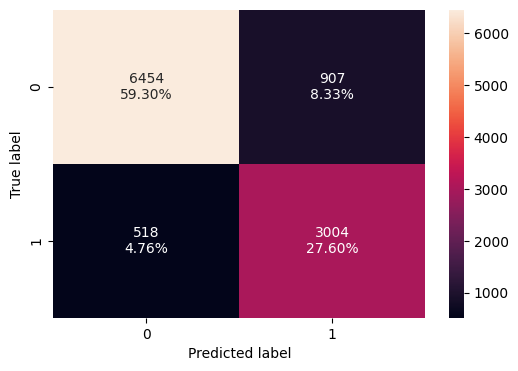

In [ ]:
#matrix of test set with ccp_alpha
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
#performance metrics on test set
decision_tree_post_test = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86906,0.85292,0.76809,0.80829


- There is a decrease in all metrics when comparing the train and test models using the 'best_model' decision tree; however, the values are still some of the larger scores on performance metrics we've seen so far. *This shows our model is not suffering from overfitting as much as our default model was.*
- Our f1_score on test data is the highest we have seen, which is important to consider.

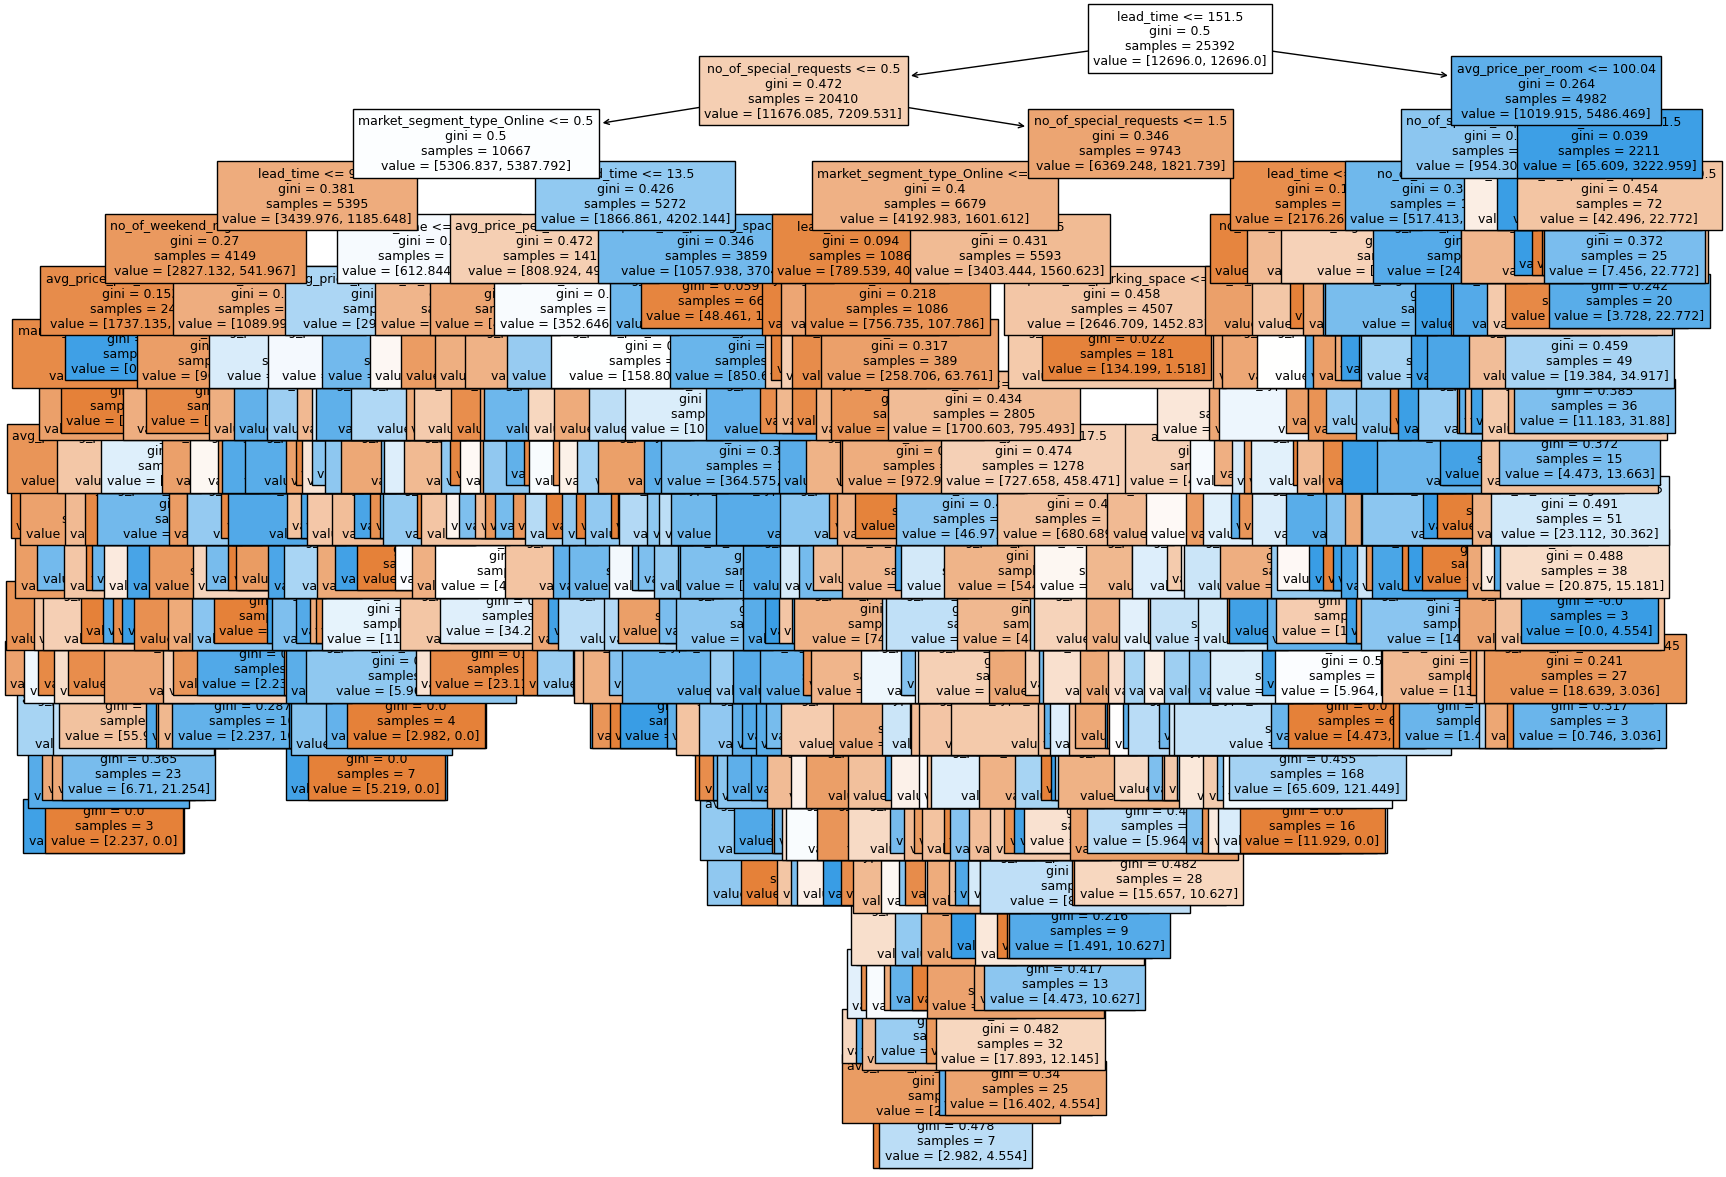

In [ ]:
#view post-pruned tree
plt.figure(figsize=(20, 15))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

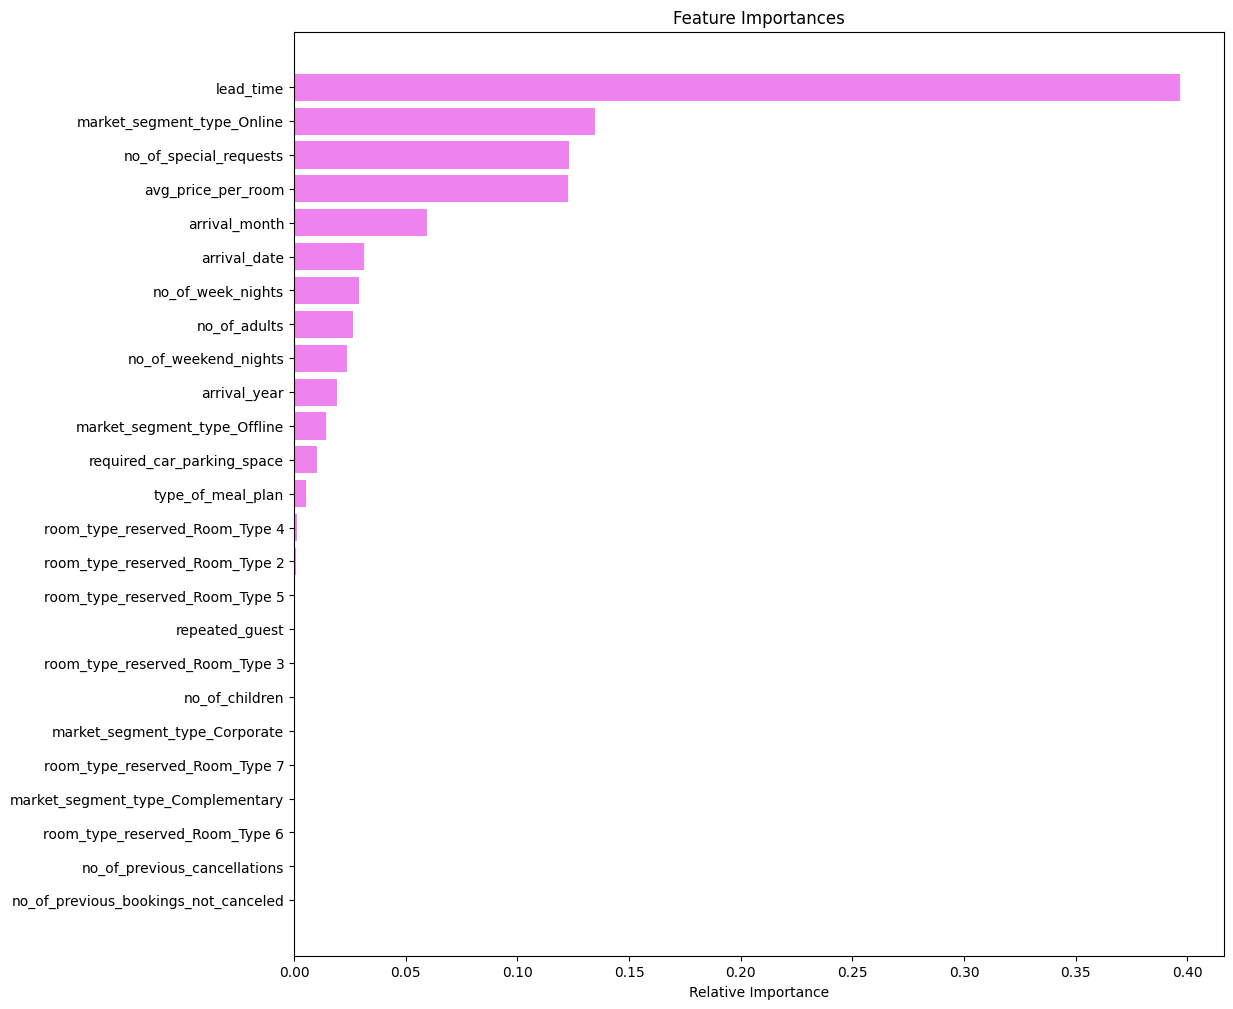

In [ ]:
#view important features
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:
- This post-pruned model considers more attributes signifcant. The top attribute of importance remains lead_time.
- Our previous decision path seen in the pre-pruned model has been extended by three decisions: "If lead time is less than or equal to 151 days, special requests less than or equal to 0.50 (no requests), market segment online is less than or equal to 0.50 (not booked online), lead time is less than or equal to 90.5, weekend nights is less than or equal to 0.50 (no weekends), price is greater than 196.5 euros, **market segment offline is greater than 0.50 (booked offline), lead time is less than or equal to 16.5 days, price is less than or equal to 68.5 euros**, then the booking will not be cancelled (class: 0)."

### Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_default.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Default Build",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Default Build,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89520
Recall,0.98661,0.78620,0.89657
Precision,0.99578,0.72420,0.80676
F1,0.99117,0.75393,0.84929


In [ ]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test_default.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Default Build",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Default Build,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87329,0.83497,0.86906
Recall,0.81403,0.78336,0.85292
Precision,0.79838,0.72758,0.76809
F1,0.80613,0.75444,0.80829


**Conclusions on Decision Tree Model**
- When it comes to *overfitting*, the post-prune tree has higher train scores than the pre-prune tree, indicating it fits the training data better. To check if overfitting is a concern, we see that the test scores for the post-prune tree are also higher than the pre-prune tree. It is worth noting that the gap between the train and test scores of the pre-prune tree is narrower.
- Our focus on the INN Hotels data has been towards the **F1 Score**. The post-prune tree shows strong F1 scores on *both* the train and test data (train 0.849, test 0.808). The F1 Scores on the pre-prune tree train and test sets are lower values. This successful F1 Score for the test data of the *post-prune tree* suggests that it generalizes better on unseen data despite scoring so well with training data, indicating a good balance achieved by the pruning process. **We will adopt the Post-Prune Decision Tree as our Official Model**

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

### The model best used to predict cancellations for INN Hotels will be our Post-Pruned Decision tree.
- When comparing the test Performance Metrics of the Logistic Model to our Decison Tree, we see that all values of Accuracy, Recall, Precision, and F1 Score are significantly higher with the decision tree model.


1.   Log Model Accuracy = 0.78; Decision Tree Accuracy = 0.86. The Decision Tree correctly predicts 86% of the Cancelled (TP) and Not Cancelled (TN) bookings.
2.   Log Model Recall = 0.78; Decision Tree Recall = 0.85. The Decision Tree's higher recall score represents a higher rate of correctly identifying actual booking cancellations.
3.  Log Model Precision = 0.63; Decision Tree Precision = 0.76. The Decision Tree's higher precision score better represents how many predicted cancellations were truly cancelled.
4. Log Model F1 = 0.70; Decision Tree F1 = 0.80. The Decision Tree has a better balance between precision and recall. This is important as our Cancelled vs. Not Cancelled data displayed an imbalance; there were more bookings that were not cancelled (class: 0).
- Our Decision Tree helps us understand the most important attributes that lead to predicting Cancelled bookings. **The top 4 features that will help INN Hotels strategize booking policies are: Lead time, Online market, special requests, and average room price.**

### Business Insights:
- From our EDA, we observed many patterns about what is preferred from customers. Understanding these patterns helps us relate to our Decision Tree's important features.
1. *Customers that book online are most likely to cancel.* INN Hotels would benefit from re-evaluating their websites and gathering additional data to better understand if their online platform is confusing to customers, or if their methods of communicating post-online bookings could be improved (i.e., confirming via email)
2. *More special requests show less cancellations.* INN Hotels could take this information and apply it to their online booking platform. It seems that, when a customer is excited to recieve special treatments (high floors, good views, elevator access), they do not cancel. INN Hotels should ensure there is a method for making special requests online to encourage enthusiasm, It is important that the company displays all of the amazing things their hotels offer!
3. *INN Hotels data displayed a minority of return customers.* The company would benefit from offering a rewards program; our EDA displayed repeated guests are less likely to cancel.
4. *A greater lead time shows higher likelihood of cancellations.* There are instances of customers booking over 200 days in advance. It would be worth exploring a restriction on how far in advance INN Hotels allows a customer to schedule a booking. To further incentivize advance bookings not being cancelled, the company could add a "perk" to the aforementioned rewards program , where return customers can "unlock" dates further in advance. This would make it so that the population of customers with lower chances of cancelling (return customers) are the group with correlation to advance timelines.



